In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, ConfusionMatrixDisplay
from collections import defaultdict
import os
import re

In [3]:
authors_short_dict = {"MWS": "Mary Shelley",
                      "HPL": "H. P. Lovecraft", "EAP": "Edgar Allan Poe"}
df = pd.DataFrame(pd.read_json(
    "preprocessing_output/preprocessed_test_W.json").author)
df["author_short"] = df.author
df.author = df.author.apply(lambda x: authors_short_dict[x])
for filename in os.listdir("results_output/"):
    fileparts = filename.split("_")
    method = fileparts[1]
    if "template" in method:
        continue
    preprocessing = ".".join(fileparts[2].split(".")[:-1])
    df[f"{method} with {preprocessing}"] = pd.read_json(
        f"results_output/results_{method}_{preprocessing}.json")
df = df.reindex(["author",
                 "author_short",
                 "bayes with W",
                 "bayes with WL",
                 "bayes with WSP",
                 "bayes with WSPH5e-4",
                 "bayes with WSPH1e-4",
                 "bayes with WSPH5e-5",
                 "bayes with WSPH1e-5",
                 "bayes with WSPH1e-6",
                 "bayes with C",
                 "bayes with CSP",
                 "bayes with CSPH5e-4",
                 "bayes with CSPH1e-4",
                 "bayes with CSPH5e-5",
                 "bayes with CSPH1e-5",
                 "bayes with CSPH1e-6",
                 "lda with W",
                 "lda with WL",
                 "lda with WSP",
                 "lda with WSPH5e-4",
                 "lda with WSPH1e-4",
                 "lda with WSPH5e-5",
                 "lda with WSPH1e-5",
                 "lda with WSPH1e-6",
                 "lda with C",
                 "lda with CSP",
                 "lda with CSPH5e-4",
                 "lda with CSPH1e-4",
                 "lda with CSPH5e-5",
                 "lda with CSPH1e-5",
                 "lda with CSPH1e-6",], axis=1)
# display(df)

metrics = [("Accuracy", accuracy_score), ("Precision", lambda x, y: precision_score(x, y, average="macro")), ("Recall",
                                                                                                              lambda x, y: recall_score(x, y, average="macro")), ("F1 Score", lambda x, y: f1_score(x, y, average="macro"))]
methods = {"lda": "Latent Dirichlet Allocation", "bayes": "Naive Bayes Classifier"}


In [4]:
total_table = pd.DataFrame()
for (name, func) in metrics:
    for method in ["bayes", "lda"]:
        authors = defaultdict(lambda: [])
        for author in ["EAP", "HPL", "MWS"]:
            method_df = df.loc[:, df.columns.str.contains(f"(?=.*author)|(?=.*{method})")]
            author_df = pd.DataFrame({"author": method_df["author"]})
            author_df = pd.concat([author_df, method_df.iloc[:, 1:].apply(
                    lambda x: [1 if author == i else 0 for i in x])], axis=1) 
            author_df = author_df.rename(columns=lambda x: re.sub(r".*\s(\S+)$", r"\1", x))
            authors[author] = author_df.iloc[:, 2:].apply(lambda x: func(author_df["author_short"], x))
        authors = pd.DataFrame(authors)
        total_table = pd.concat([total_table, authors], axis=1)
pd.set_option('display.max_columns', None)
total_table.columns = pd.MultiIndex.from_product([map(lambda x: x[0], metrics), [methods["bayes"], methods["lda"]], [authors_short_dict["EAP"], authors_short_dict["HPL"], authors_short_dict["MWS"]]])
total_table

Accuracy                               \
         Naive Bayes Classifier                                
                Edgar Allan Poe H. P. Lovecraft Mary Shelley   
W                      0.872829        0.913943     0.896578   
WL                     0.872829        0.913943     0.896578   
WSP                    0.876915        0.914198     0.905516   
WSPH5e-4               0.636619        0.767365     0.756895   
WSPH1e-4               0.789837        0.830184     0.829418   
WSPH5e-5               0.806180        0.862870     0.861593   
WSPH1e-5               0.853422        0.894791     0.890705   
WSPH1e-6               0.876915        0.914198     0.905516   
C                      0.724974        0.783963     0.766343   
CSP                    0.750511        0.808733     0.780388   
CSPH5e-4               0.629724        0.717314     0.699949   
CSPH1e-4               0.711951        0.768641     0.756384   
CSPH5e-5               0.722676        0.781920     0.775281   
CSPH1e-5               0.746425        0.803371     0.780644   
CSPH1e-6               0.750511        0.808733     0.780388   

                                                                   \
         Latent Dirichlet Allocation                                
                     Edgar Allan Poe H. P. Lovecraft Mary Shelley   
W                           0.762513        0.797753     0.813585   
WL                          0.767875        0.791879     0.821757   
WSP                         0.789581        0.807457     0.830439   
WSPH5e-4                    0.612104        0.672625     0.656537   
WSPH1e-4                    0.694076        0.731103     0.735189   
WSPH5e-5                    0.710163        0.747446     0.762513   
WSPH1e-5                    0.770174        0.781154     0.817926   
WSPH1e-6                    0.786772        0.805669     0.818693   
C                           0.626915        0.667518     0.719867   
CSP                         0.657814        0.729571     0.740296   
CSPH5e-4                    0.633044        0.606486     0.622063   
CSPH1e-4                    0.668284        0.714760     0.693565   
CSPH5e-5                    0.687947        0.717058     0.718080   
CSPH1e-5                    0.689479        0.734678     0.722421   
CSPH1e-6                    0.651430        0.731869     0.739275   

                      Precision                               \
         Naive Bayes Classifier                                
                Edgar Allan Poe H. P. Lovecraft Mary Shelley   
W                      0.866795        0.900087     0.877484   
WL                     0.866795        0.900087     0.877484   
WSP                    0.869472        0.904697     0.890387   
WSPH5e-4               0.681102        0.740516     0.723988   
WSPH1e-4               0.779876        0.793619     0.804894   
WSPH5e-5               0.800401        0.846475     0.844871   
WSPH1e-5               0.845480        0.881756     0.876134   
WSPH1e-6               0.869472        0.904697     0.890387   
C                      0.713205        0.738852     0.728337   
CSP                    0.738769        0.770000     0.745463   
CSPH5e-4               0.634578        0.645720     0.644975   
CSPH1e-4               0.702084        0.719575     0.716444   
CSPH5e-5               0.711830        0.736419     0.738943   
CSPH1e-5               0.734682        0.763010     0.745306   
CSPH1e-6               0.738769        0.770000     0.745463   

                                                                   \
         Latent Dirichlet Allocation                                
                     Edgar Allan Poe H. P. Lovecraft Mary Shelley   
W                           0.753398        0.767926     0.852162   
WL                          0.758207        0.761661     0.857793   
WSP                         0.780373        0.772689     0.817863   
WSPH5e-4                    0.592985        0.603977     0.6

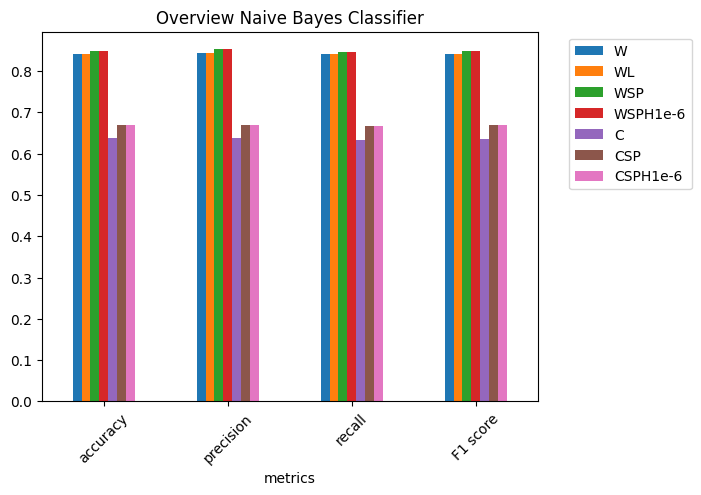

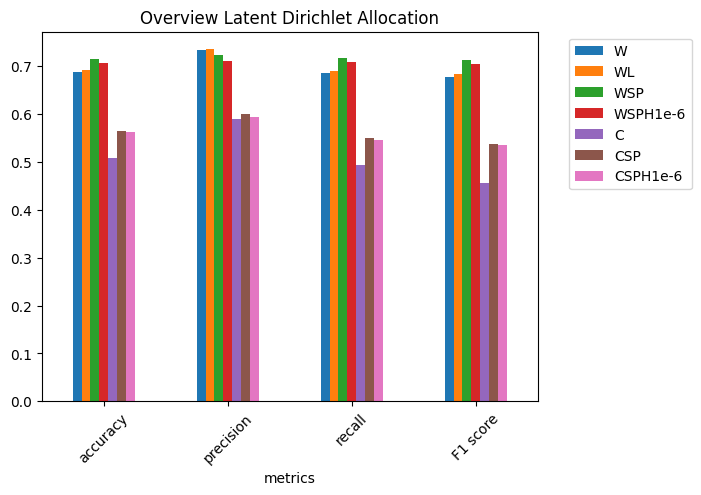

In [5]:
for method in ["bayes", "lda"]:
    method_df = df.loc[:, df.columns.str.contains(f"^(?:(?=.*\\b(?:author|{method}|author_short)\\b)(?:(?![45]).)*)$")]
    method_df = method_df.rename(columns=lambda x: re.sub(r".*\s(\S+)$", r"\1", x))
    score_df = method_df.iloc[: , 2:].apply(lambda x: [accuracy_score(x, method_df["author_short"]), precision_score(method_df["author_short"], x, average="macro"), recall_score(method_df["author_short"], x, average="macro"), f1_score(method_df["author_short"], x, average="macro")])
    score_df["metric"] = ["accuracy", "precision", "recall", "F1 score"]
    score_df.plot.bar("metric", title=f"Overview {methods[method]}", rot=45, xlabel="metrics")
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

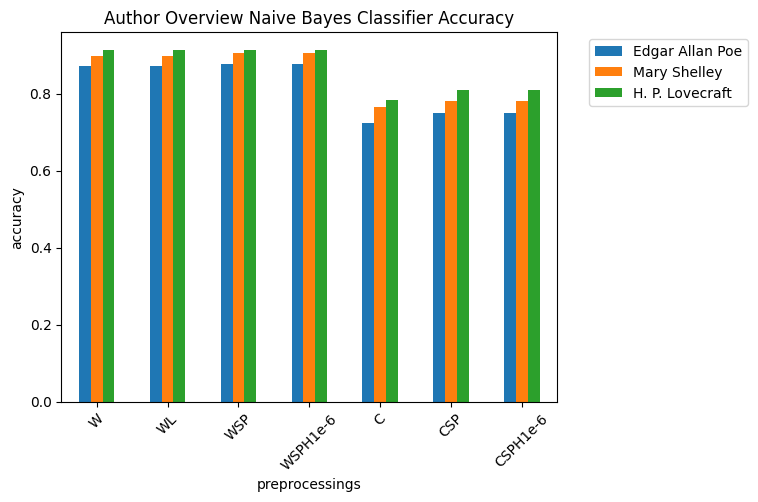

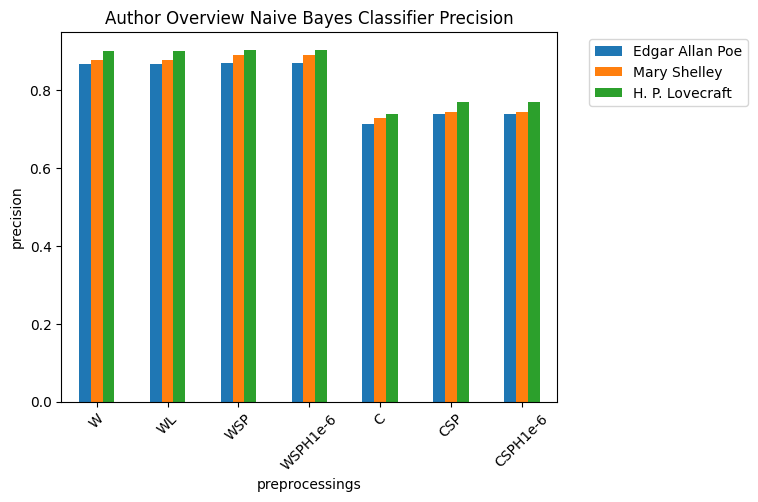

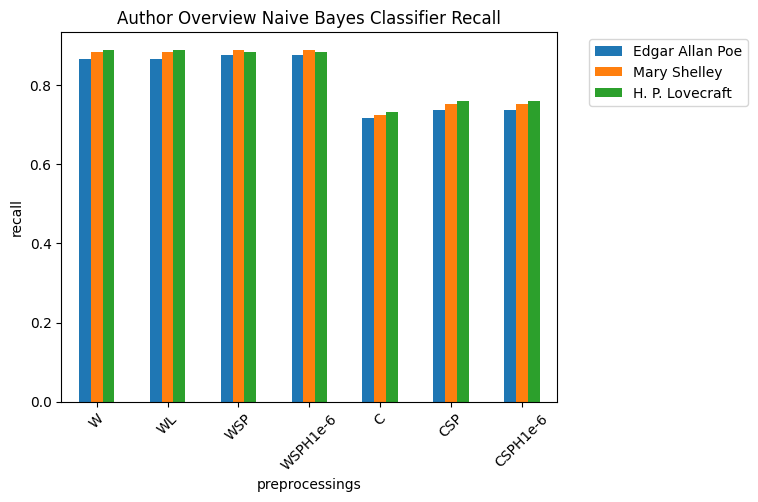

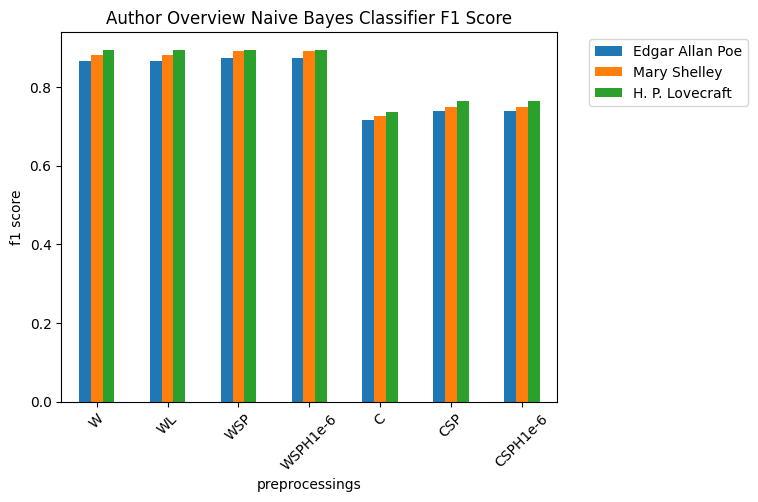

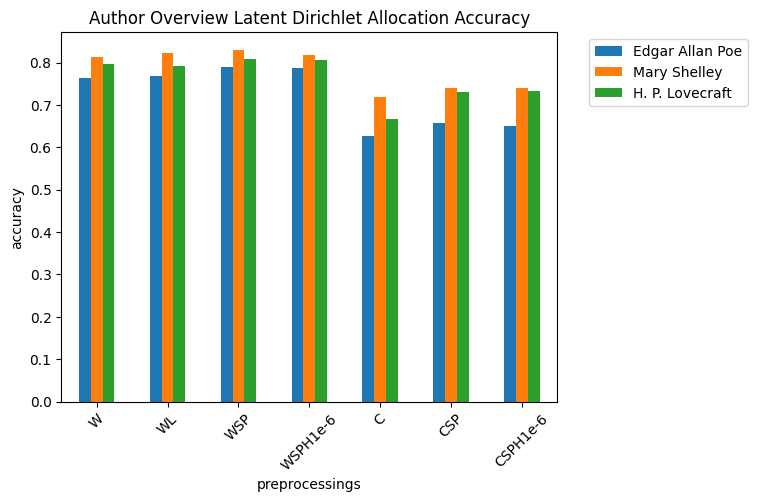

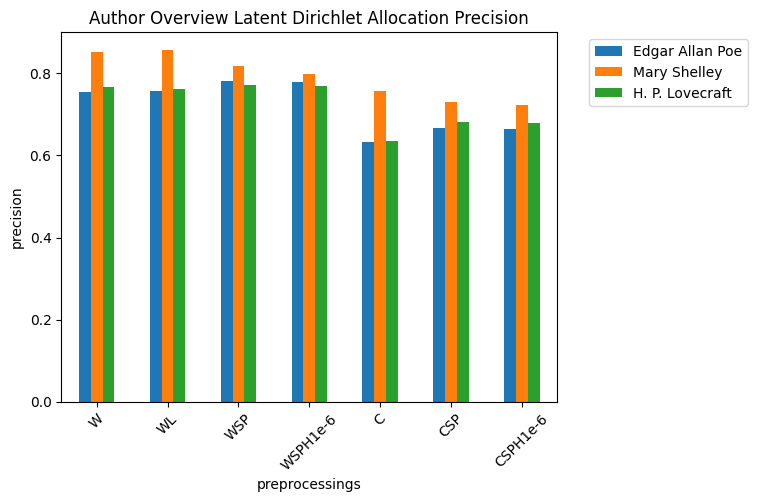

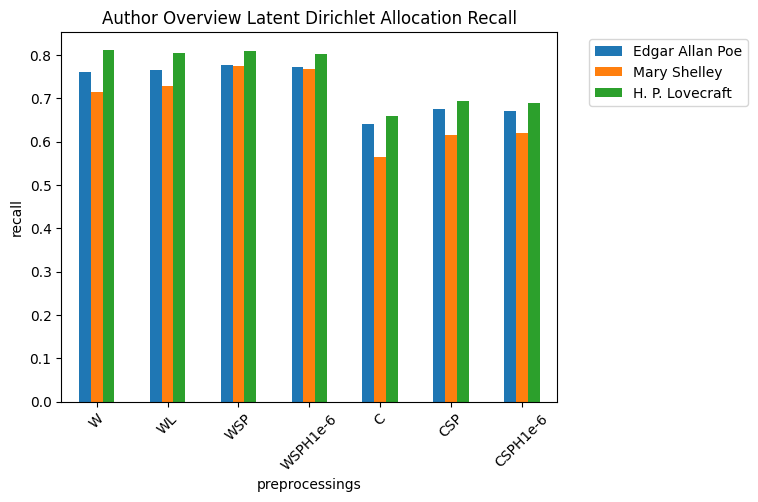

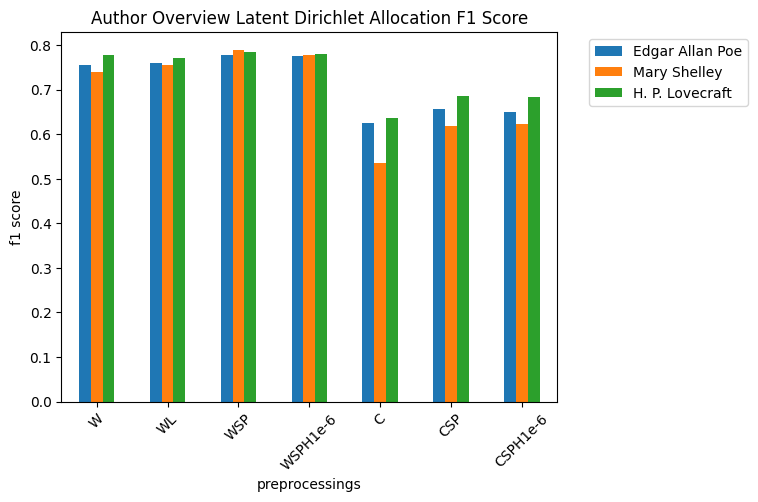

In [6]:
for method in ["bayes", "lda"]:
    for (name, func) in metrics:
        score_df = {}
        method_df = df.loc[:, df.columns.str.contains(
            f"^(?:(?=.*\\b(?:author|{method}|author_short)\\b)(?:(?![45]).)*)$")]
        for author in ["EAP", "MWS", "HPL"]:
            author_df = pd.DataFrame(
                {"author": method_df["author"]})
            author_df = pd.concat([author_df, method_df.iloc[:, 1:].apply(
                lambda x: [1 if author == i else 0 for i in x])], axis=1)
            author_df = author_df.rename(columns=lambda x: re.sub(r".*\s(\S+)$", r"\1", x))
            score_df[author] = author_df.iloc[:, 2:].apply(
                lambda x: func(author_df["author_short"], x))
        score_df = pd.DataFrame(score_df)
        score_df = score_df.rename(columns=lambda x: authors_short_dict[x])
        score_df.plot.bar(title=f"Author Overview {methods[method]} {name}", rot=45, ylabel=name.lower(), xlabel="preprocessings")
        plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')


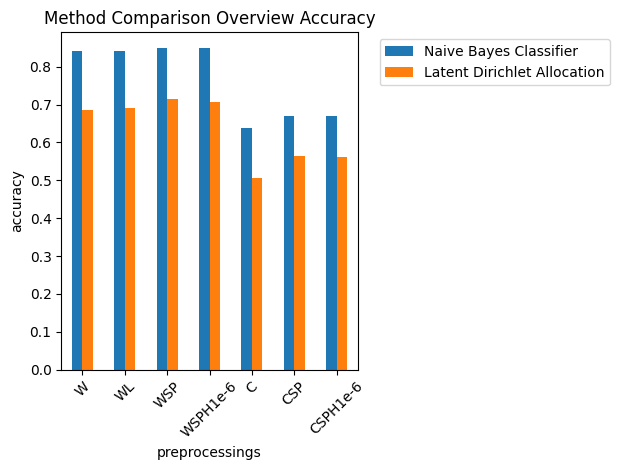

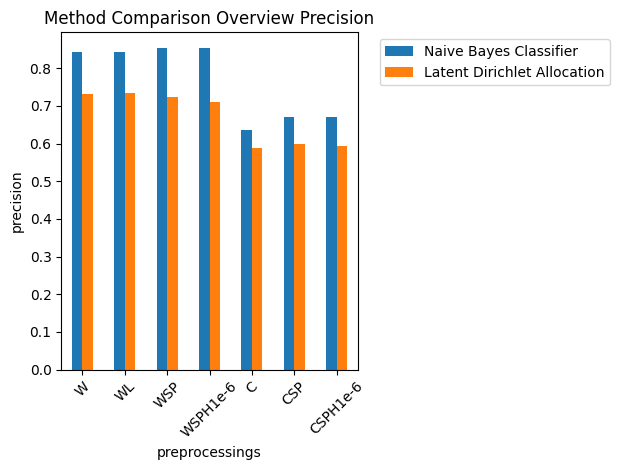

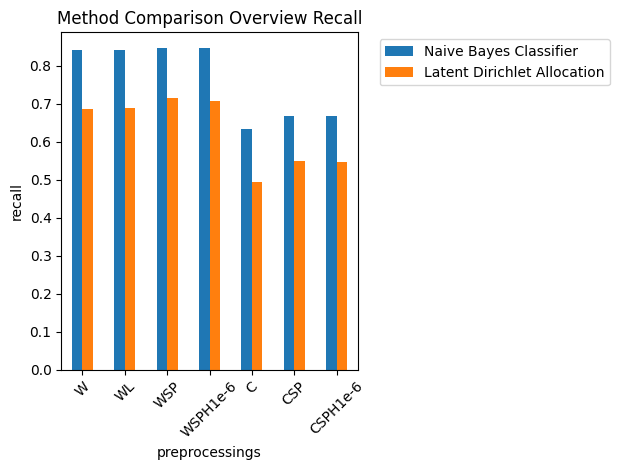

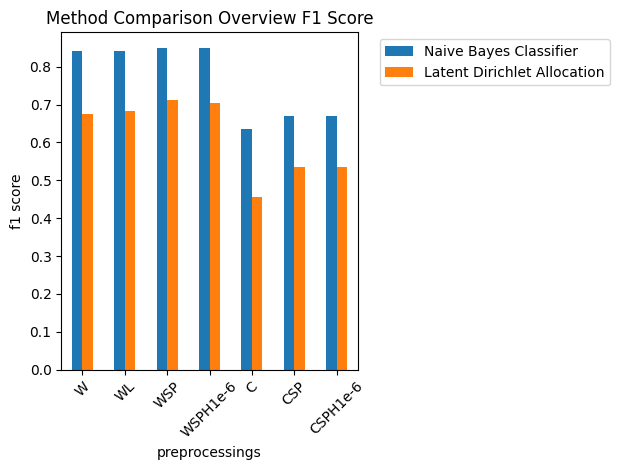

In [7]:
for (name, func) in metrics:
    preprocess_df = {}
    for method in ["bayes", "lda"]:
        score_df = df.loc[:, df.columns.str.contains(f"^(?:(?=.*\\b(?:author|{method}|author_short)\\b)(?:(?![45]).)*)$")]
        score_df = score_df.rename(columns=lambda x: re.sub(r".*\s(\S+)$", r"\1", x))
        score_df = score_df.iloc[:, 2:].apply(lambda x: func(score_df["author_short"], x))
        preprocess_df[method] = score_df
    preprocess_df = pd.DataFrame(preprocess_df)
    preprocess_df = preprocess_df.rename(columns=lambda x: methods[x])
    preprocess_df.plot.bar(title=f"Method Comparison Overview {name}", rot=45, ylabel=name.lower(), xlabel="preprocessings")
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.tight_layout()

/tmp/ipykernel_699/3389146986.py:12: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  process_df = author_df.loc[:, author_df.columns.str.contains(f"(.*{method}.*)|(.*author.*)", regex=True)]
/tmp/ipykernel_699/3389146986.py:12: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  process_df = author_df.loc[:, author_df.columns.str.contains(f"(.*{method}.*)|(.*author.*)", regex=True)]
/tmp/ipykernel_699/3389146986.py:12: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  process_df = author_df.loc[:, author_df.columns.str.contains(f"(.*{method}.*)|(.*author.*)", regex=True)]
/tmp/ipykernel_699/3389146986.py:12: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extra

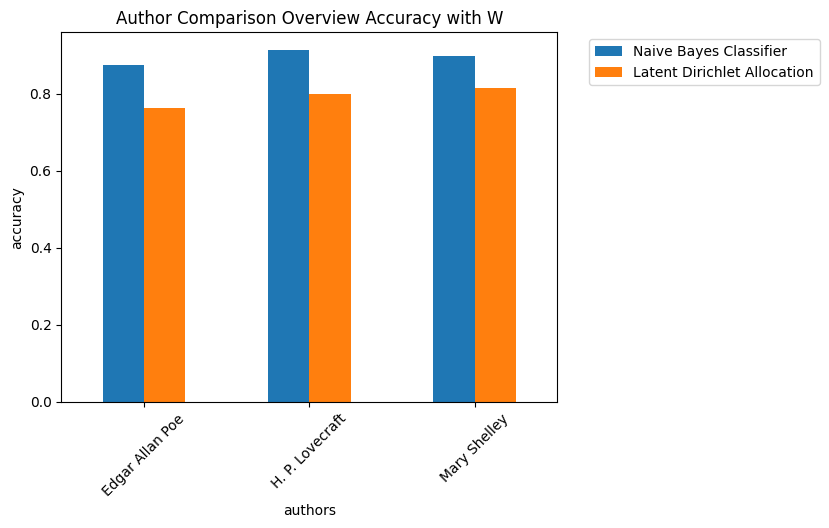

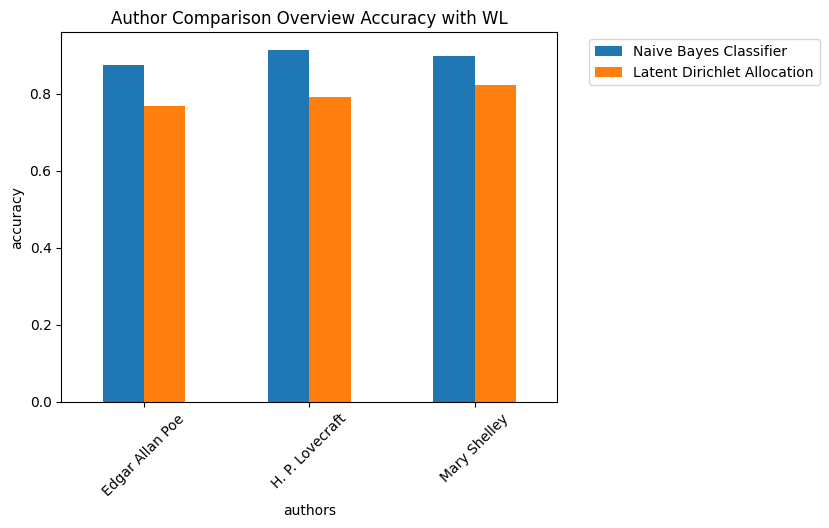

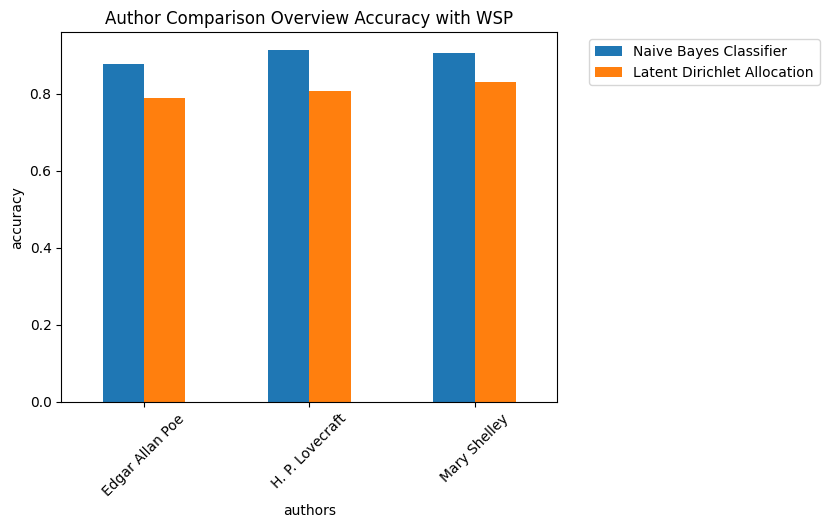

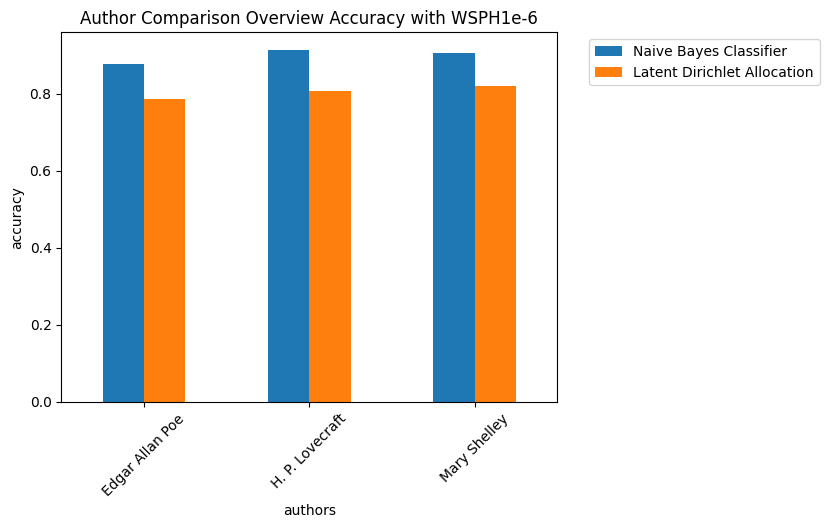

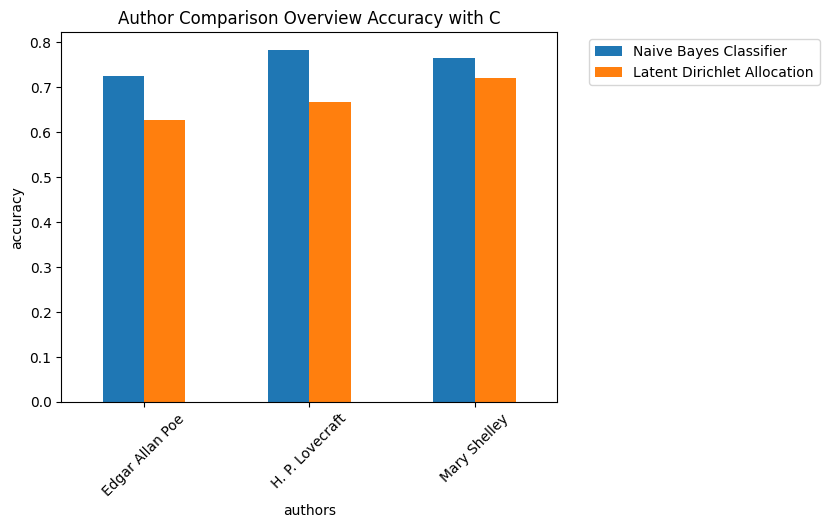

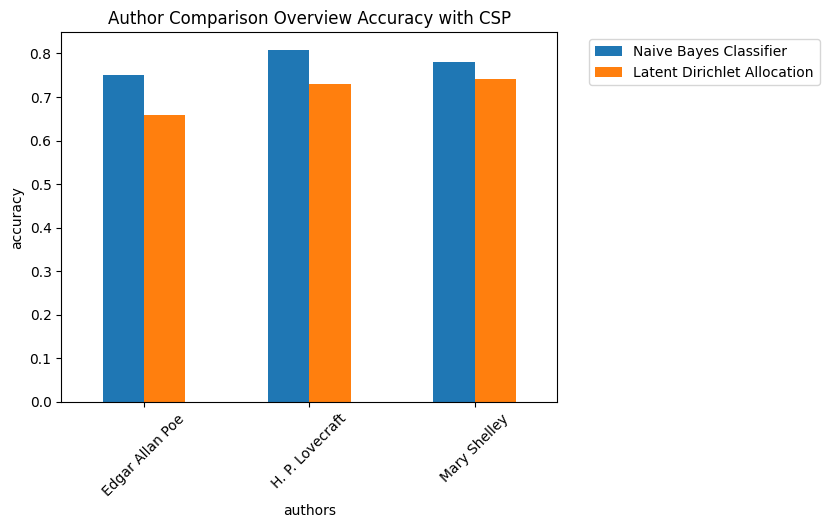

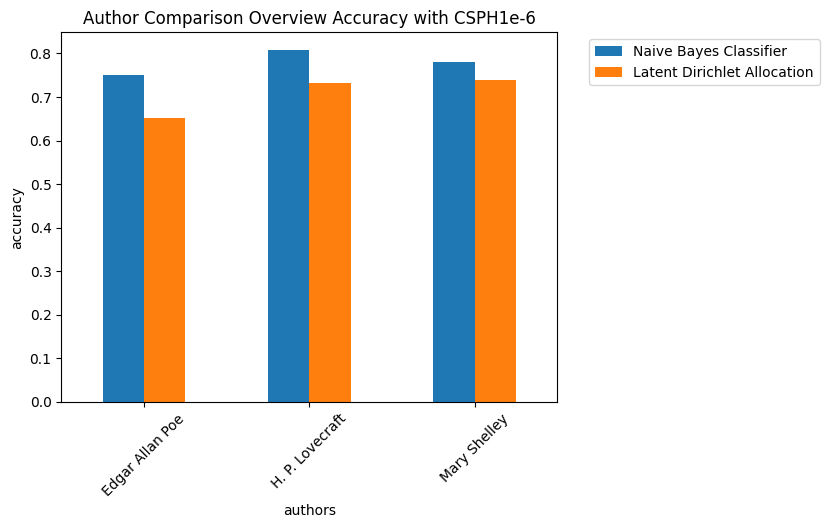

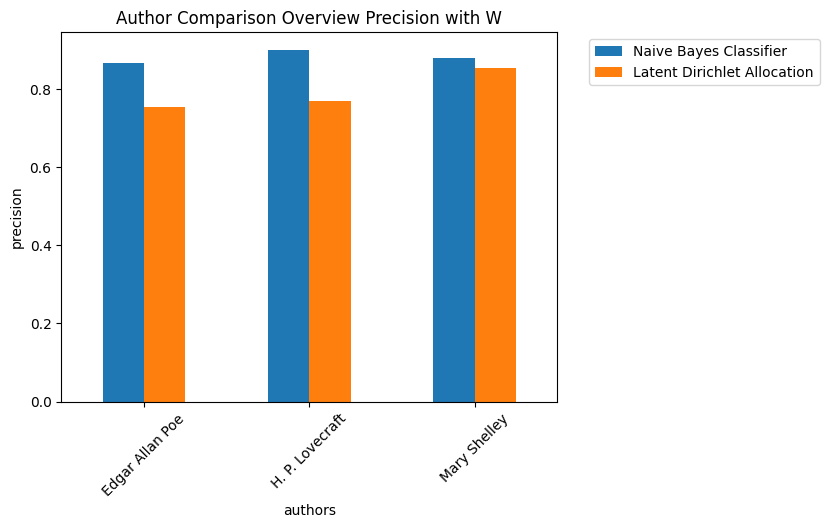

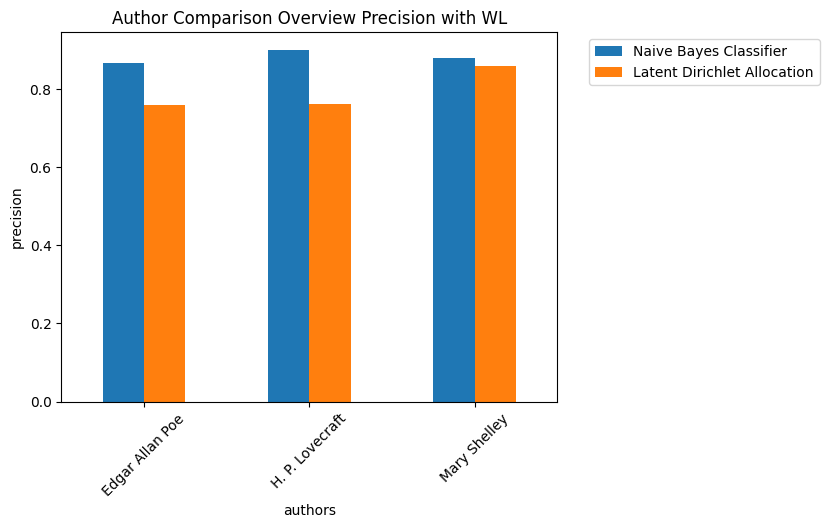

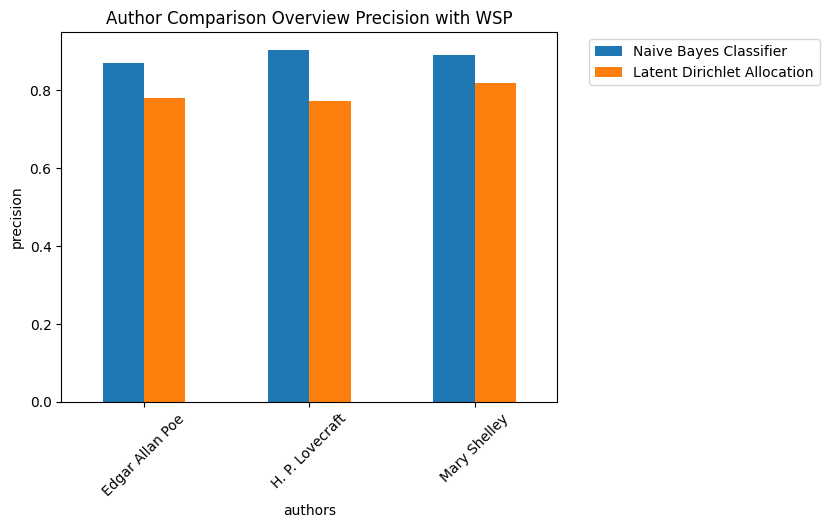

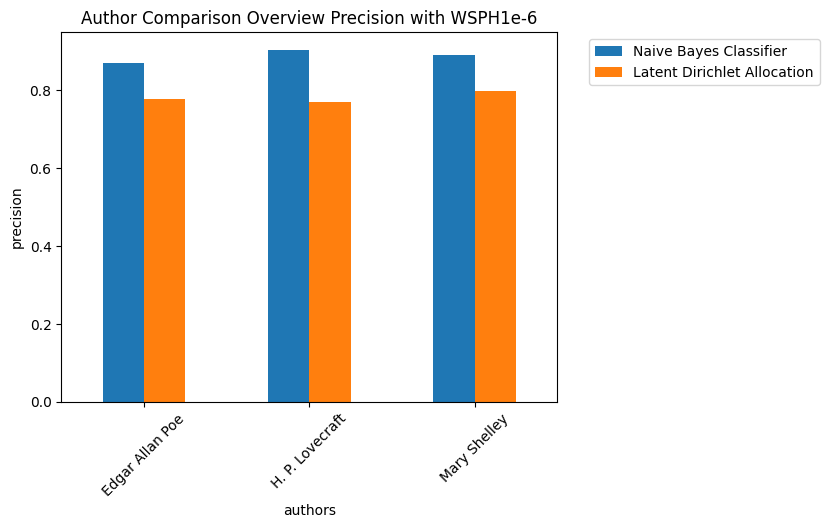

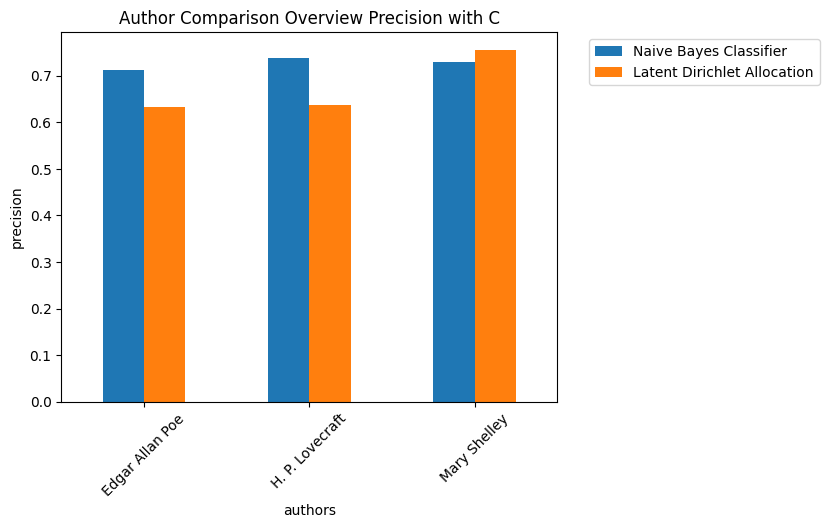

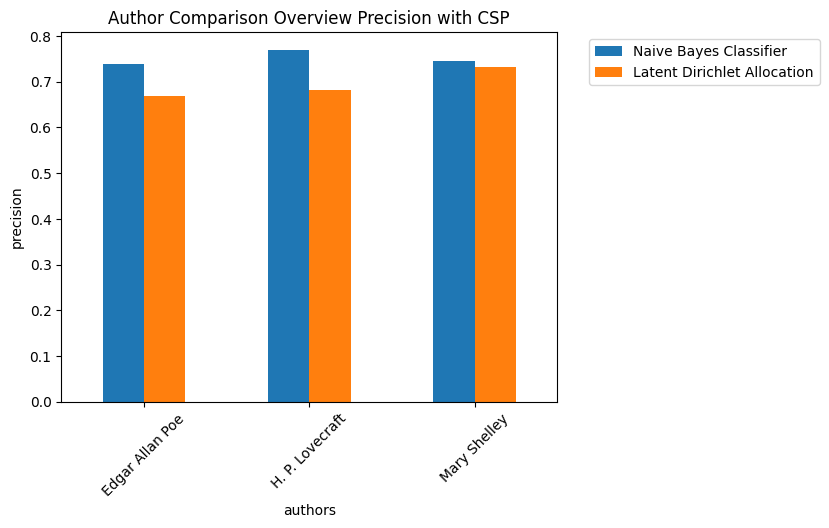

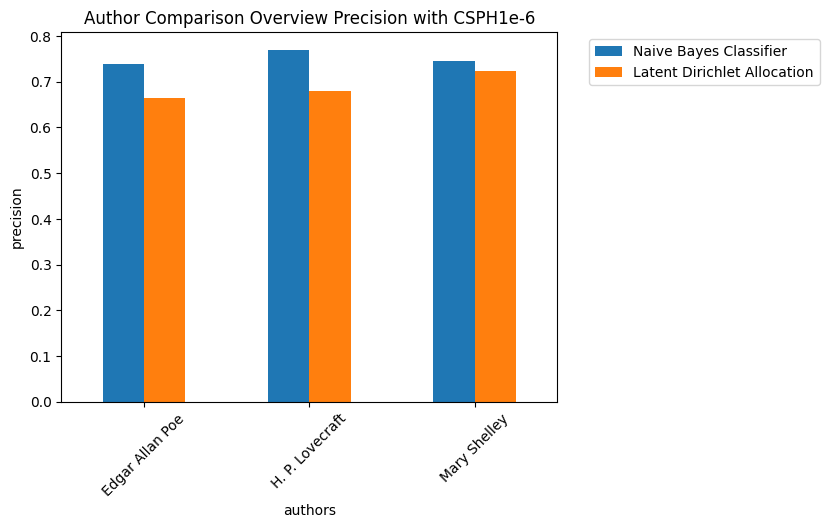

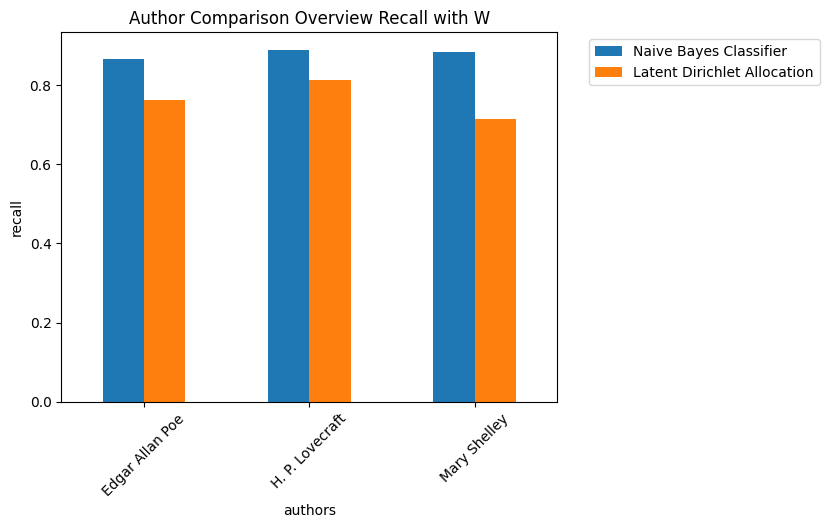

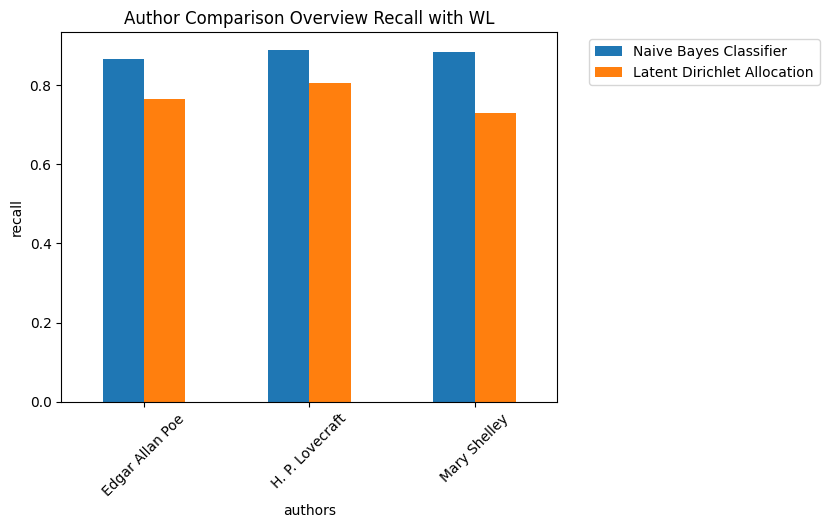

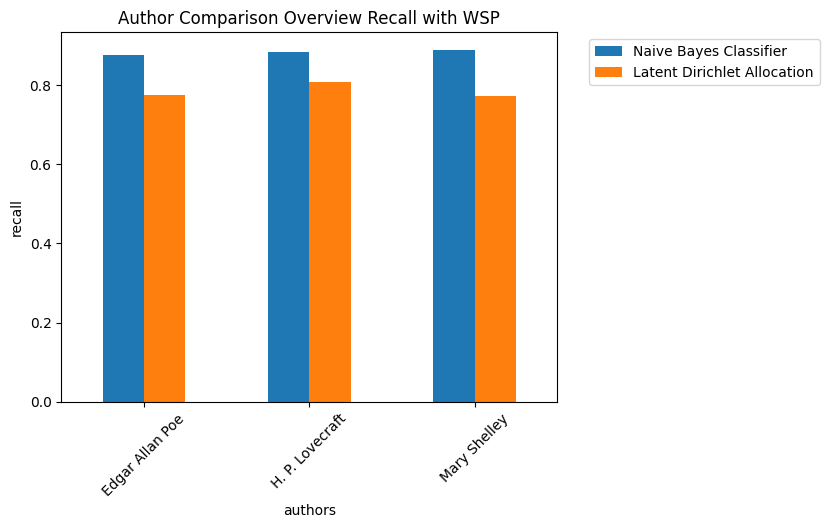

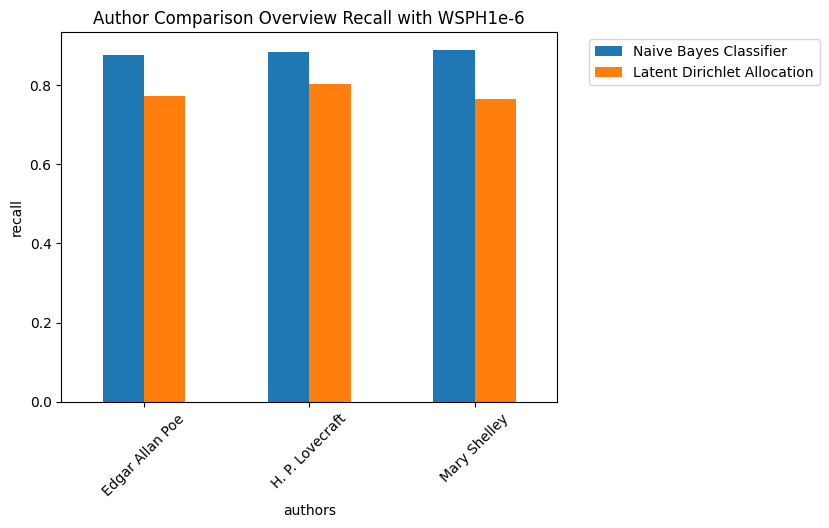

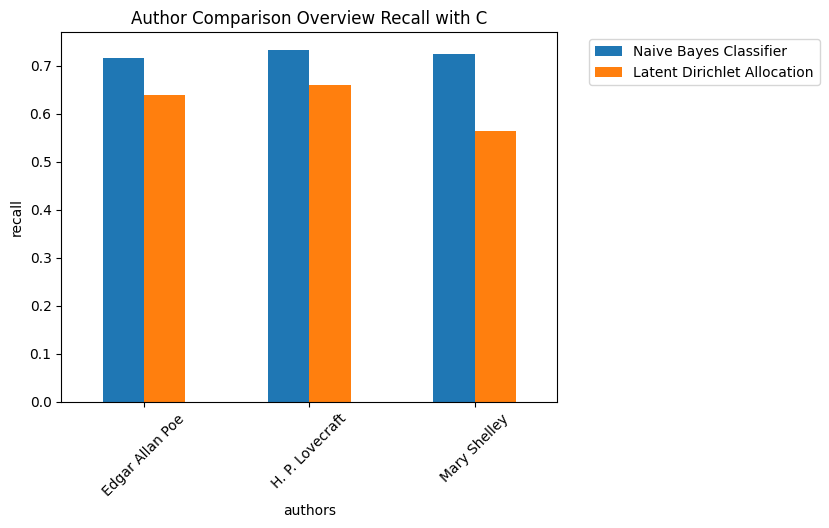

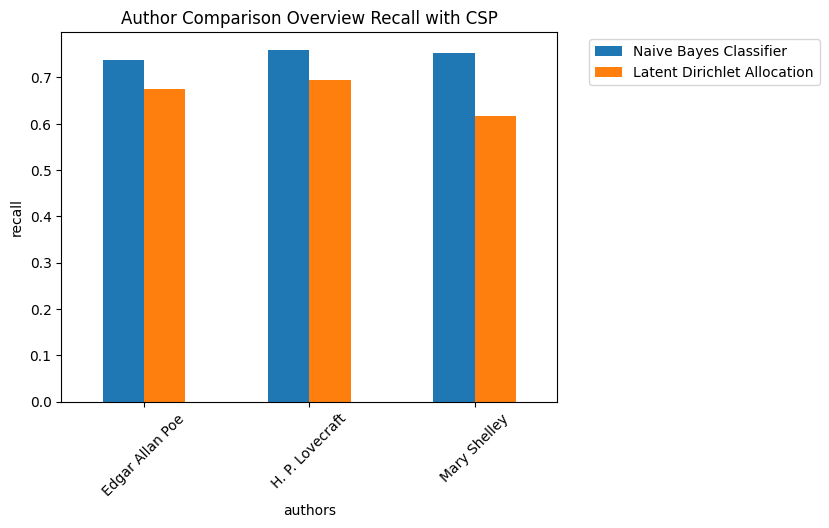

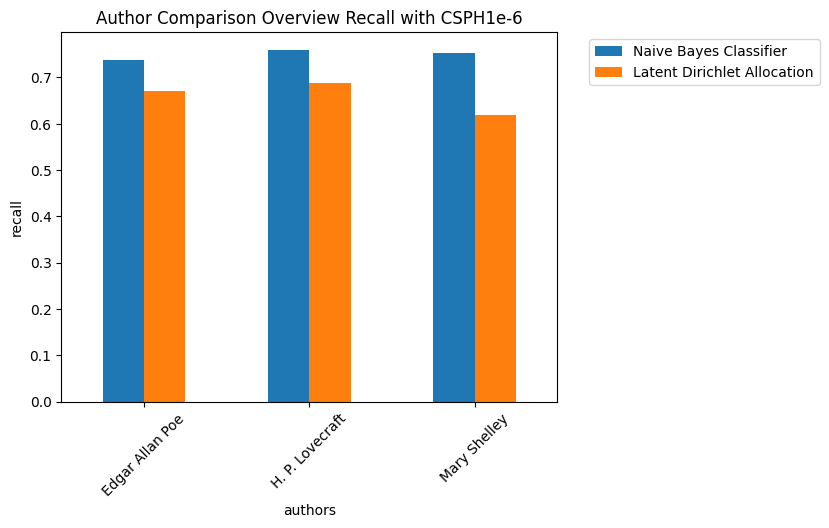

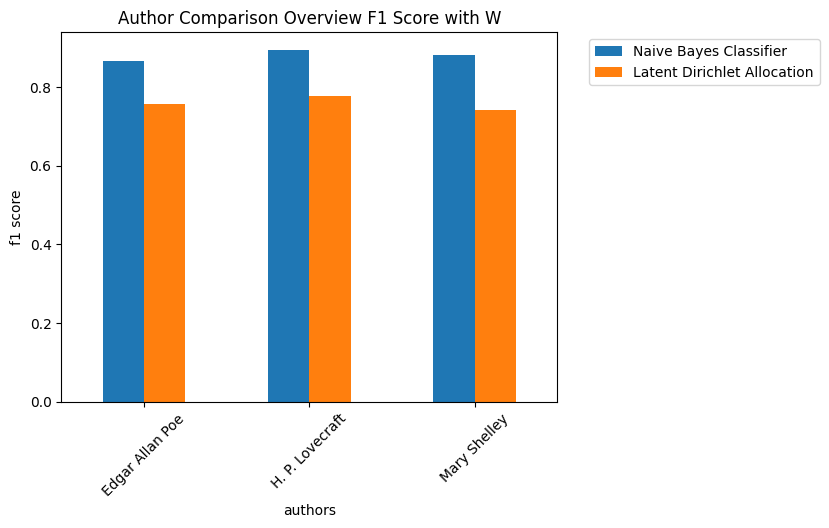

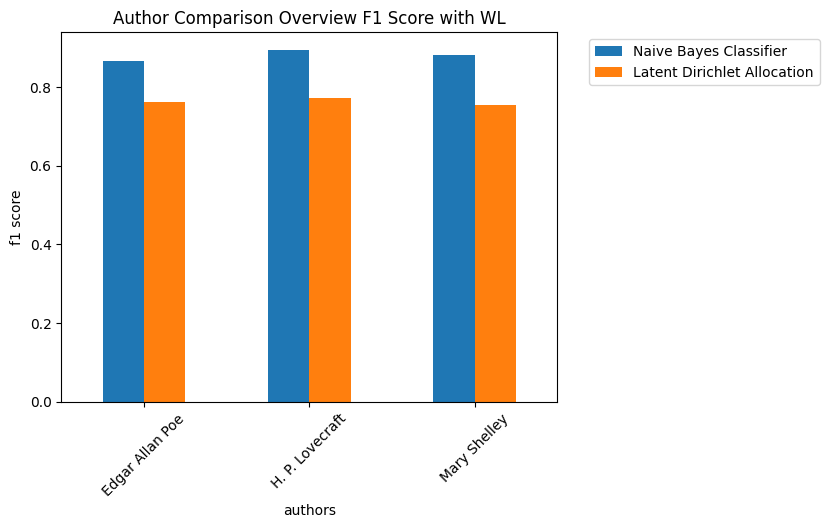

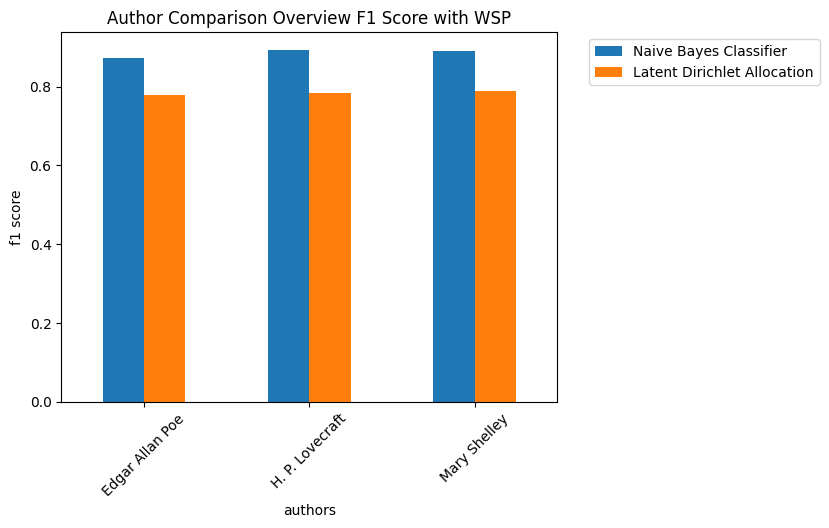

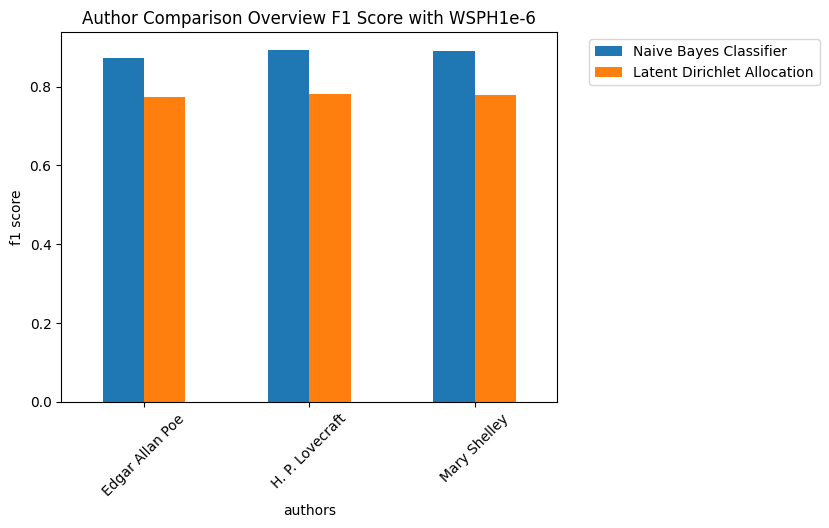

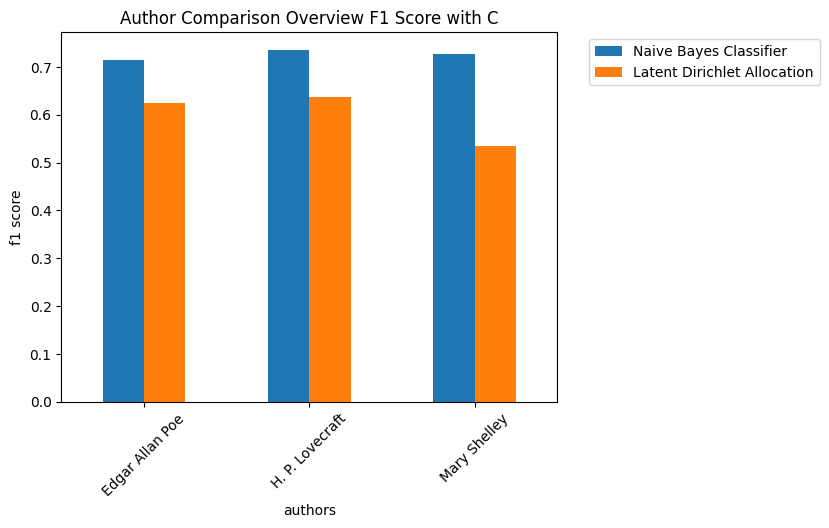

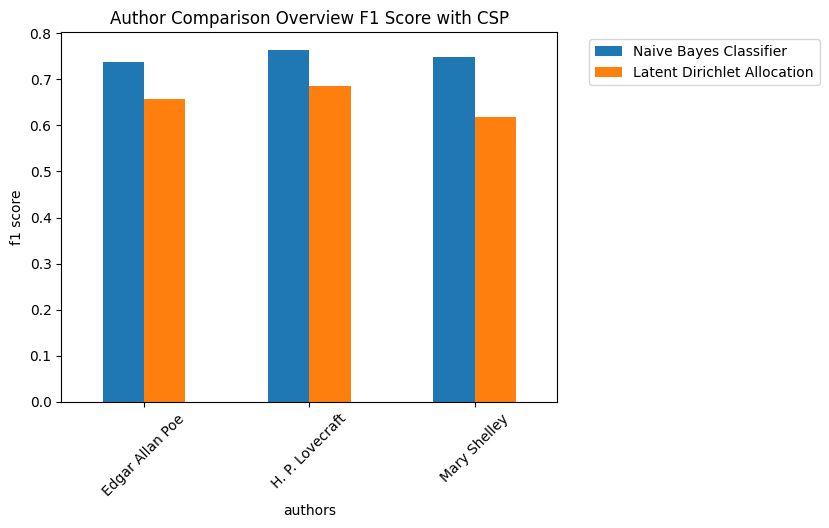

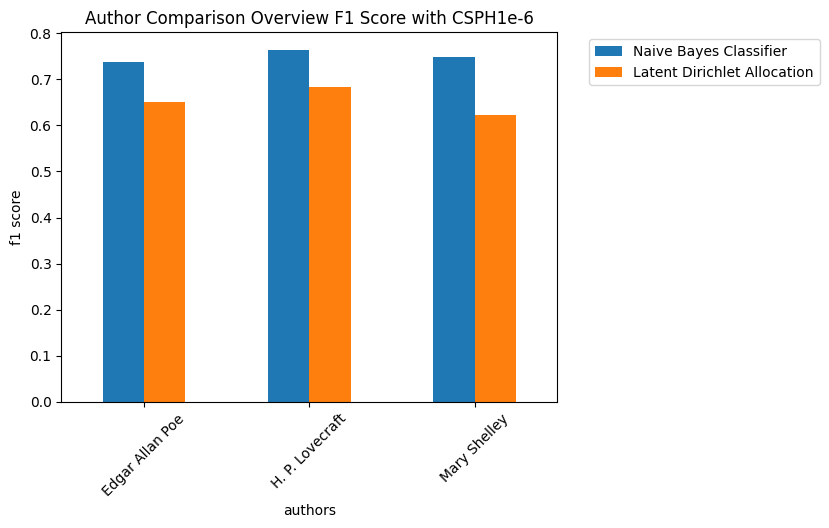

In [26]:
for (name, func) in metrics:
    method_df = df.loc[:, df.columns.str.contains(f"^[^45]*$")]
    for preprocessing in range(2,int((len(method_df.columns)) / 2 + 1)):
        authors = defaultdict(lambda: [])
        preprocess_name = ""
        for author in ["EAP", "HPL", "MWS"]:
            author_df = pd.DataFrame(
                            {"author": method_df["author"]})
            author_df = pd.concat([author_df, method_df.iloc[:, 1:].apply(
                lambda x: [1 if author == i else 0 for i in x])], axis=1)
            for method in ["bayes", "lda"]:
                process_df = author_df.loc[:, author_df.columns.str.contains(f"(.*{method}.*)|(.*author.*)", regex=True)]
                preprocess_name = re.sub(".*\s(\S+)$", r"\1", process_df.columns[preprocessing])
                authors[author].append(func(process_df["author_short"],process_df.iloc[:, preprocessing]))
        authors = pd.DataFrame(authors)
        authors = authors.rename(columns=lambda x: authors_short_dict[x])
        authors["method"] = ["bayes", "lda"]
        authors = authors.pivot_table(columns ="method")
        authors = authors.rename(columns=lambda x: x if x == "method" else methods[x])
        authors.plot.bar(title=f"Author Comparison Overview {name} with {preprocess_name}", rot=45, ylabel=name.lower(), xlabel="authors")
        plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

/tmp/ipykernel_699/1852677366.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  method_df = df.loc[:, df.columns.str.contains(f"(author|{method})")]
/tmp/ipykernel_699/1852677366.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  method_df = df.loc[:, df.columns.str.contains(f"(author|{method})")]
/home/tristan/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:512: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


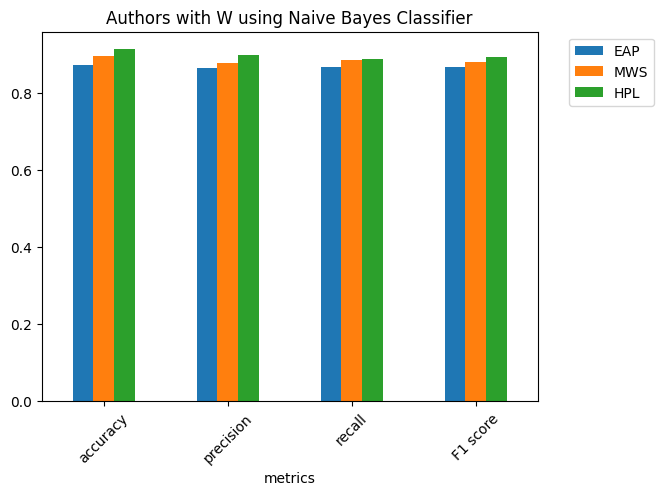

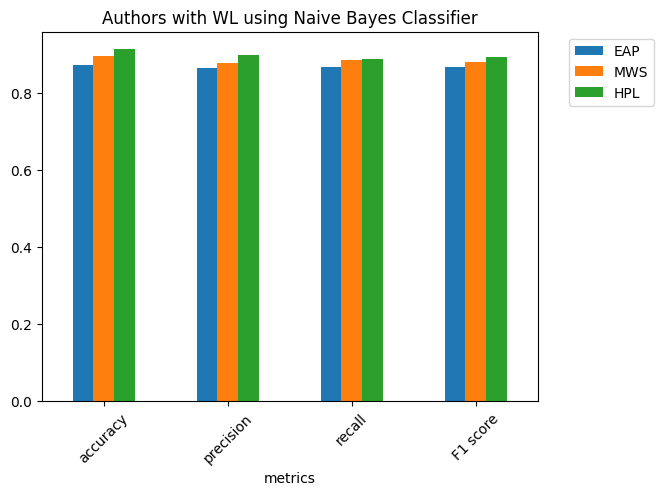

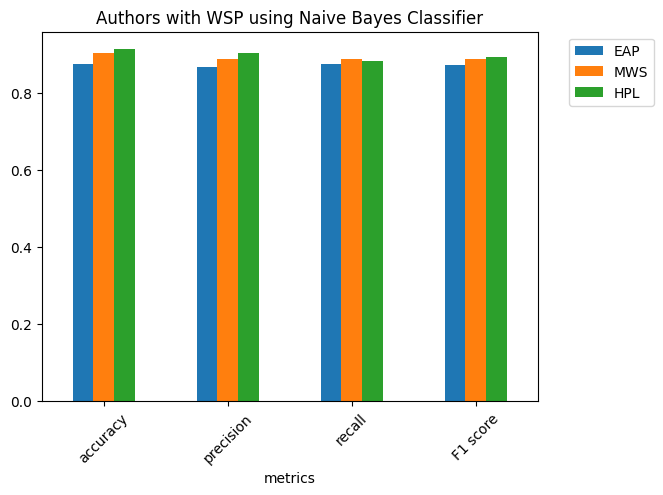

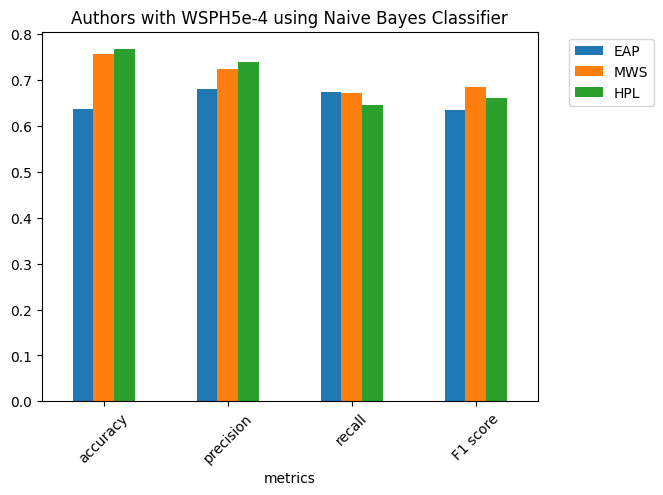

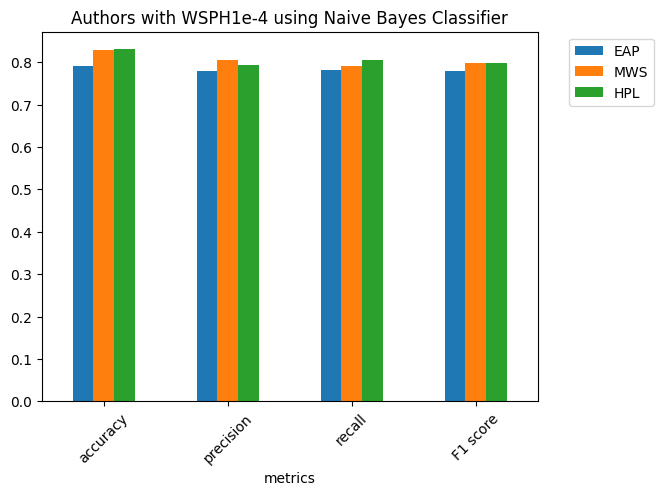

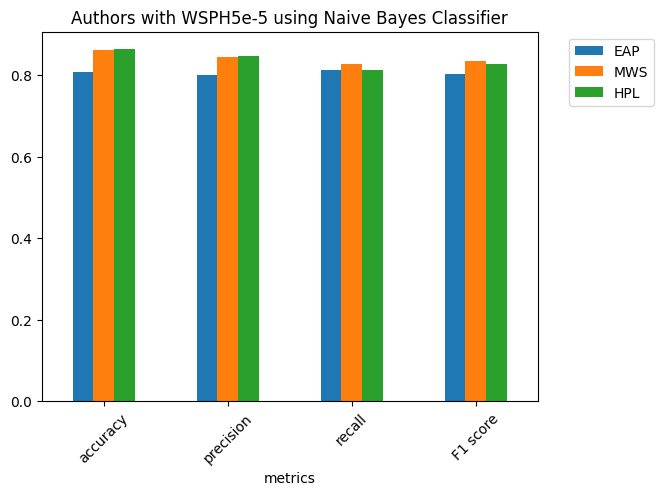

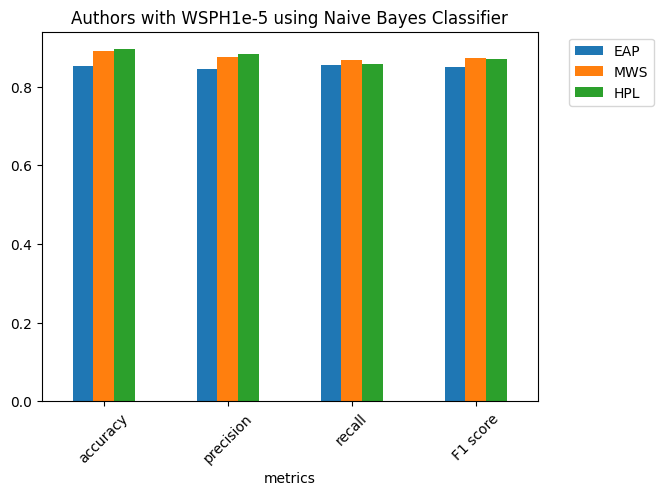

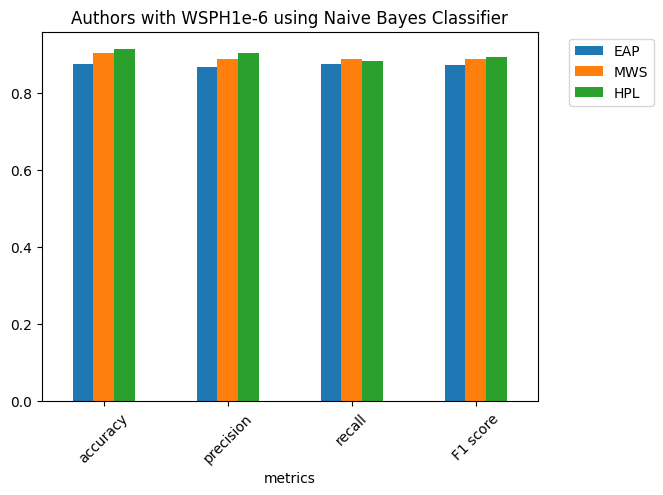

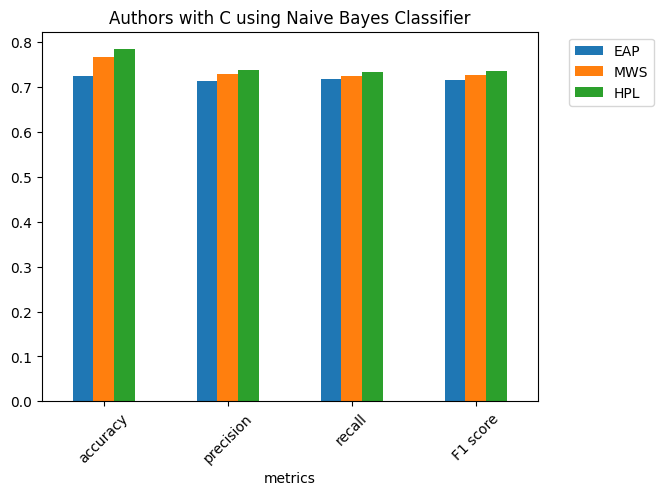

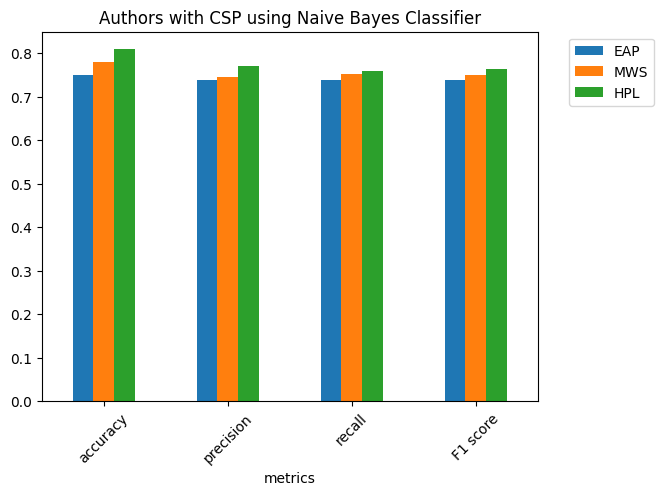

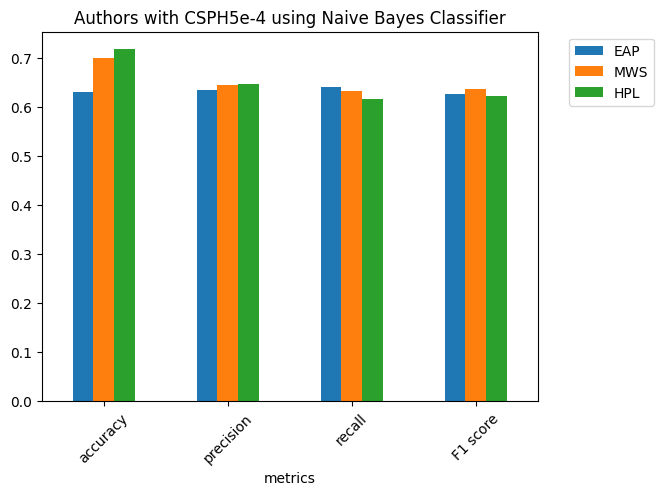

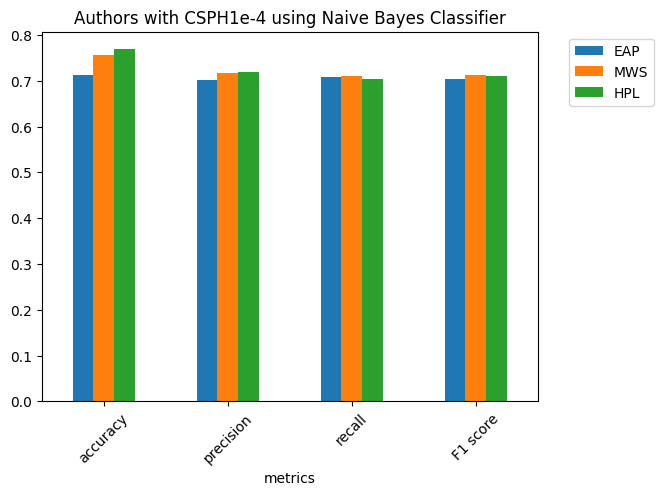

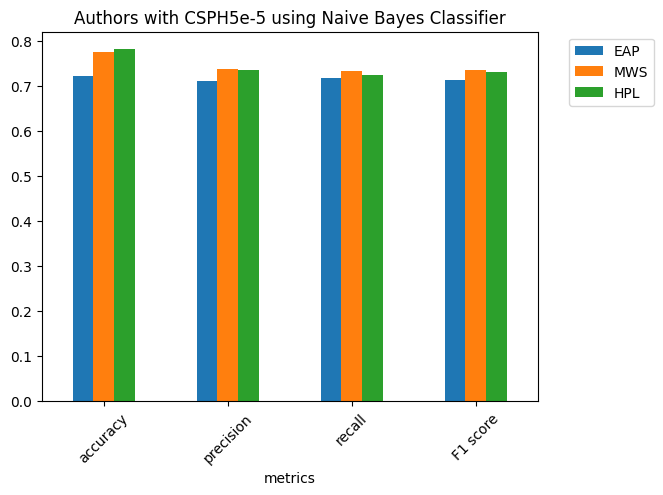

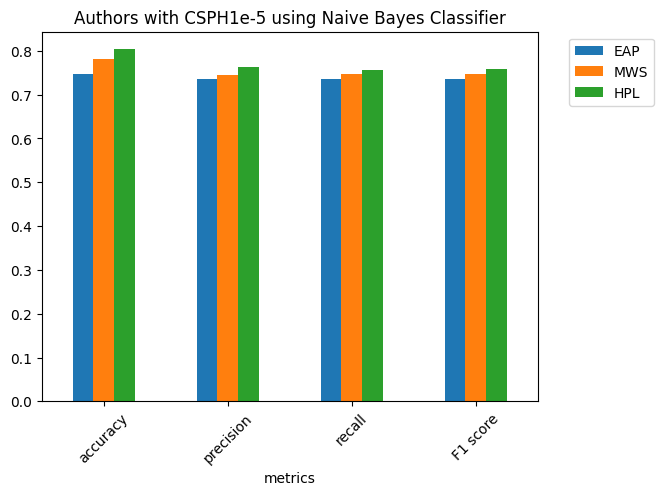

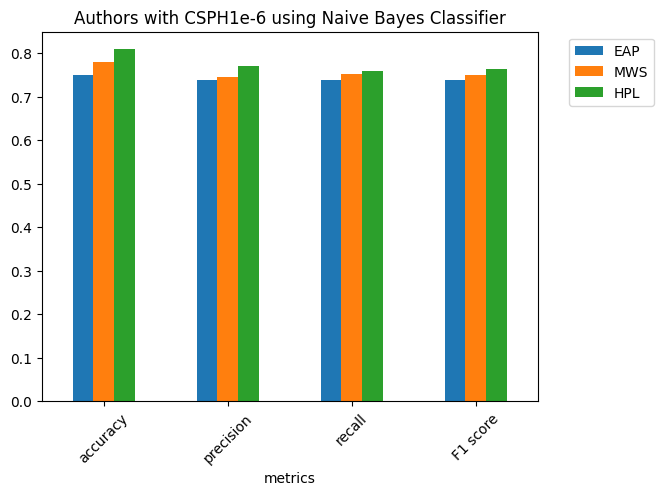

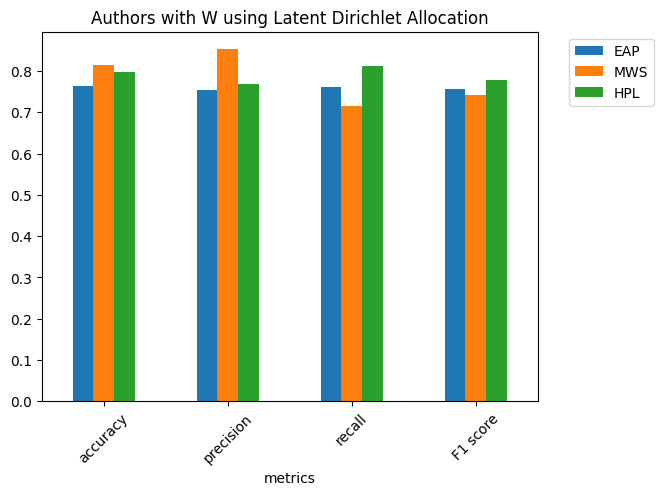

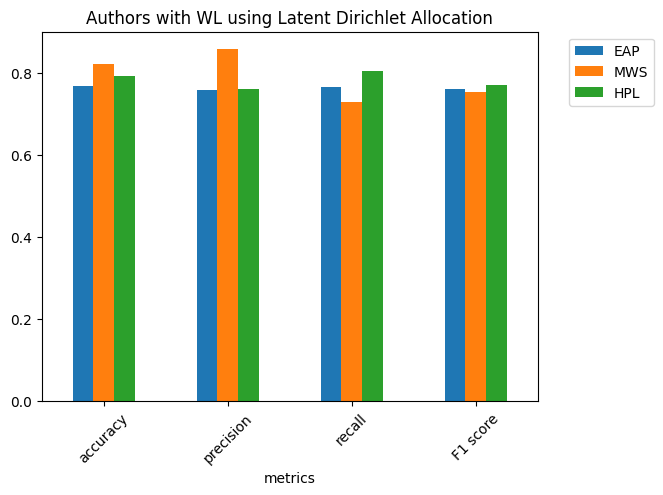

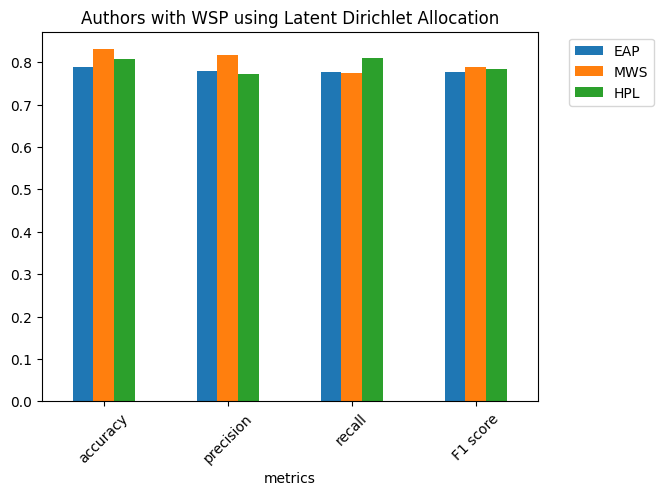

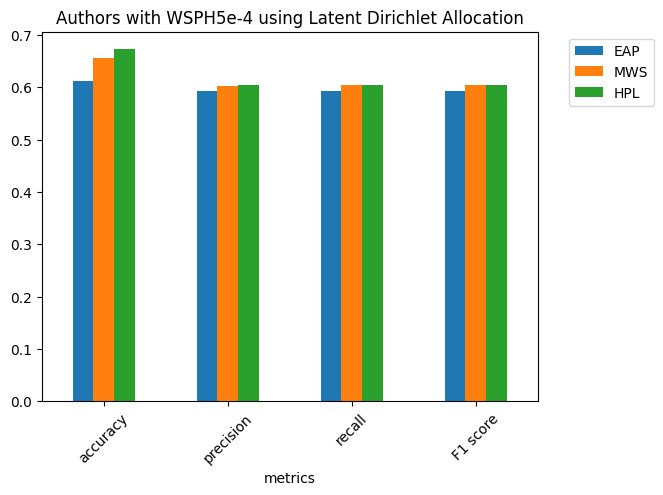

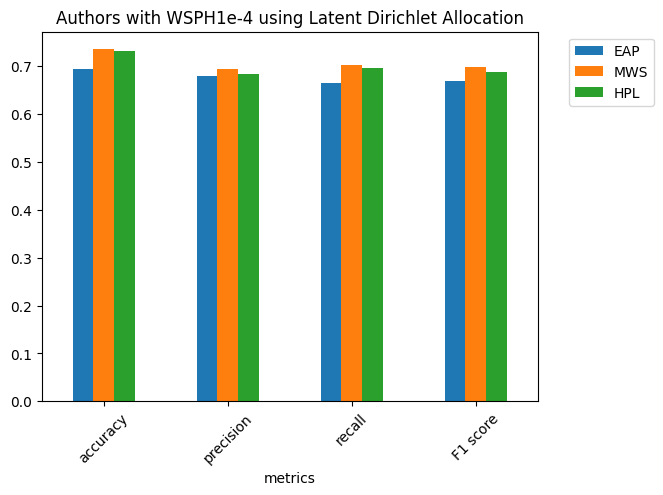

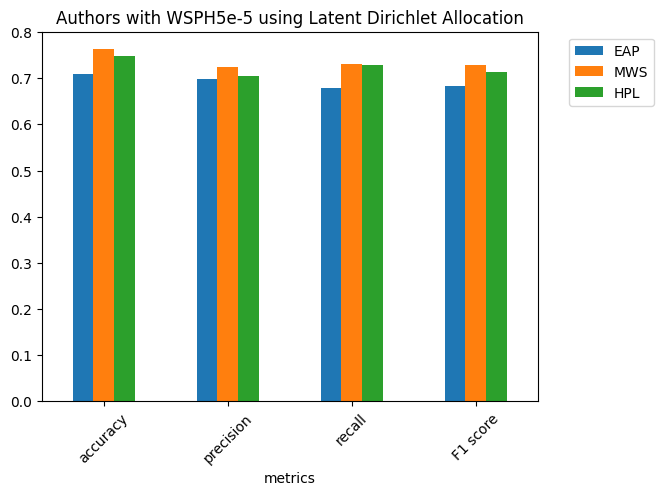

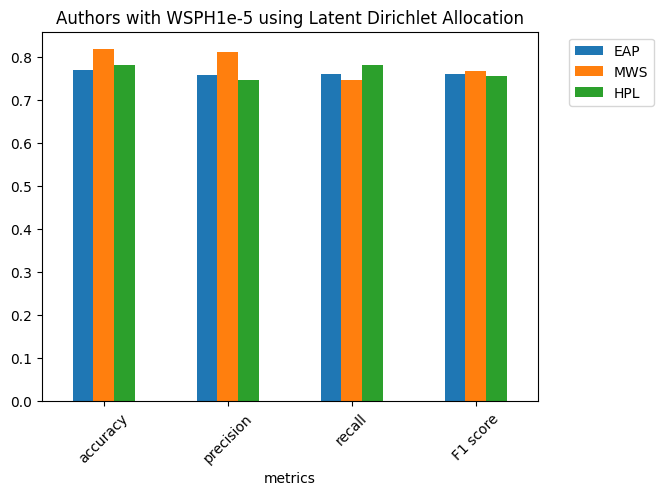

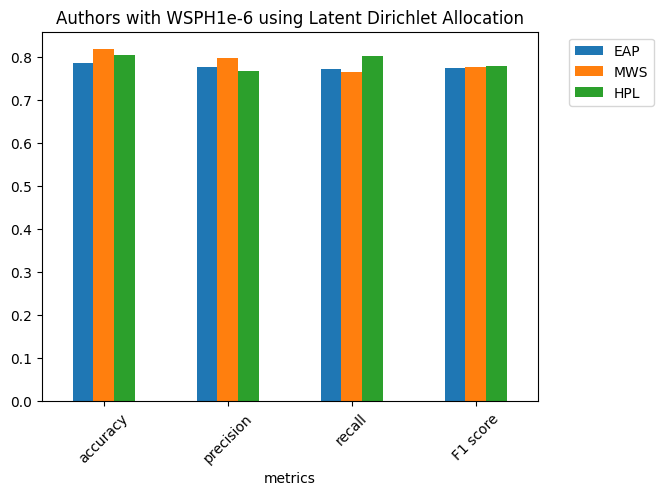

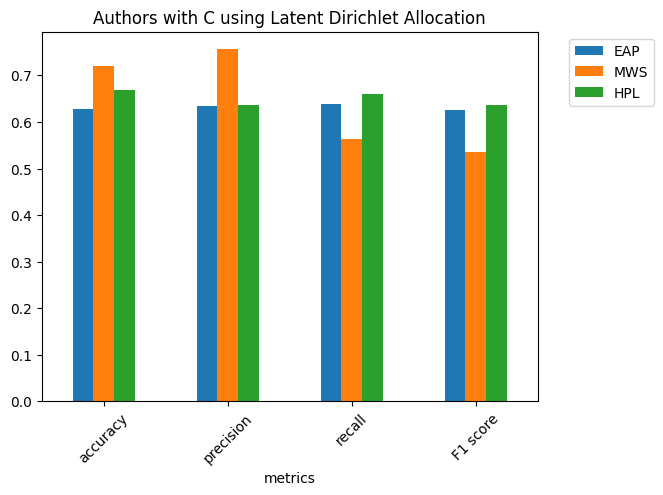

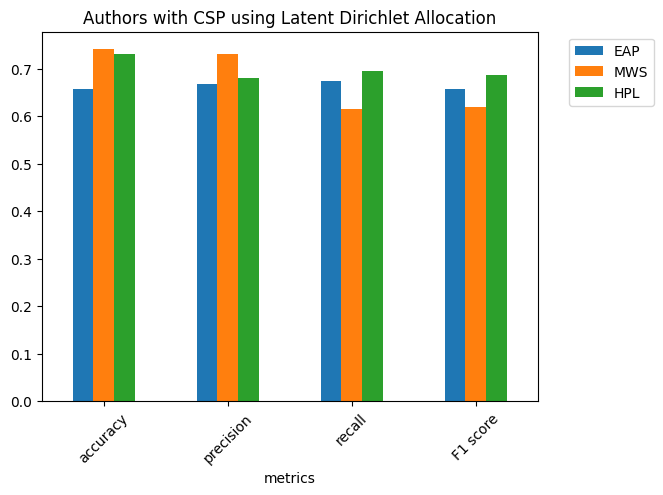

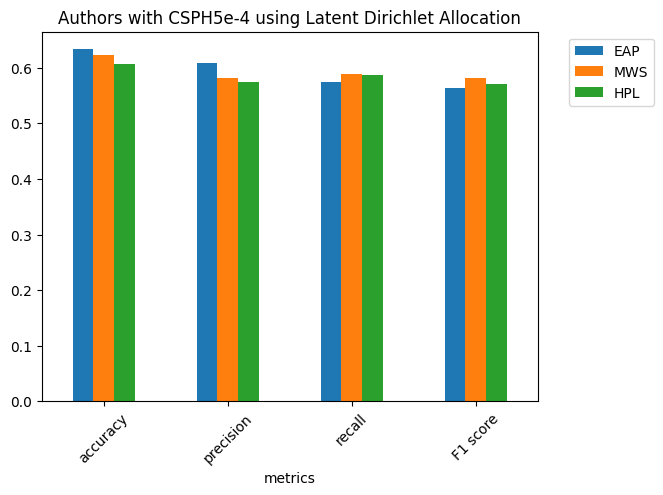

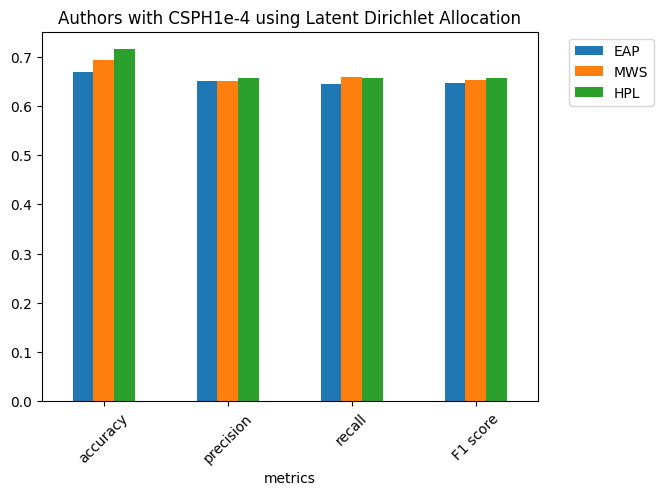

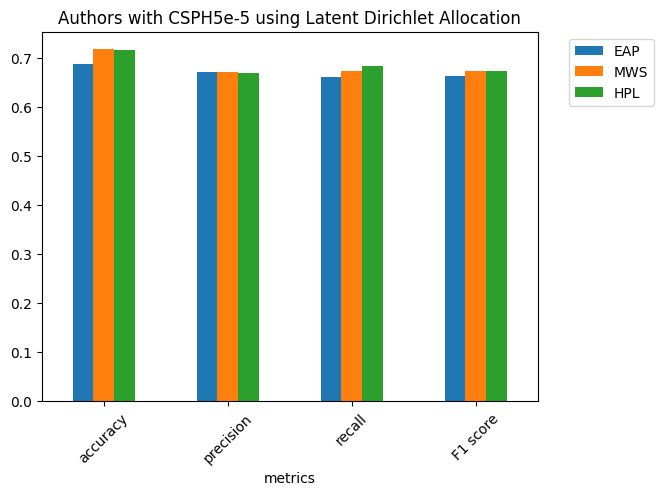

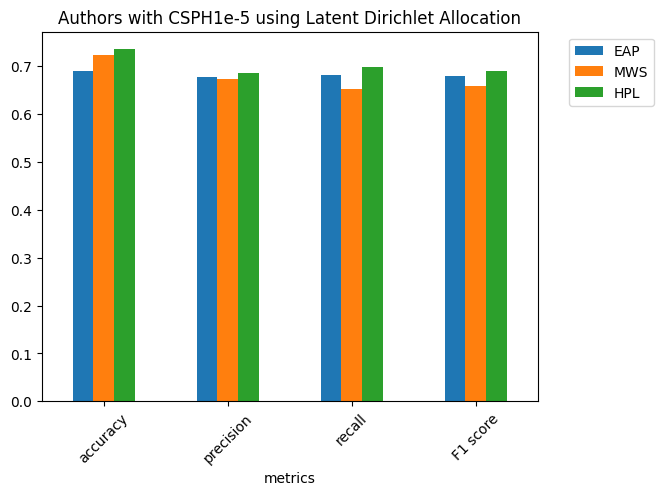

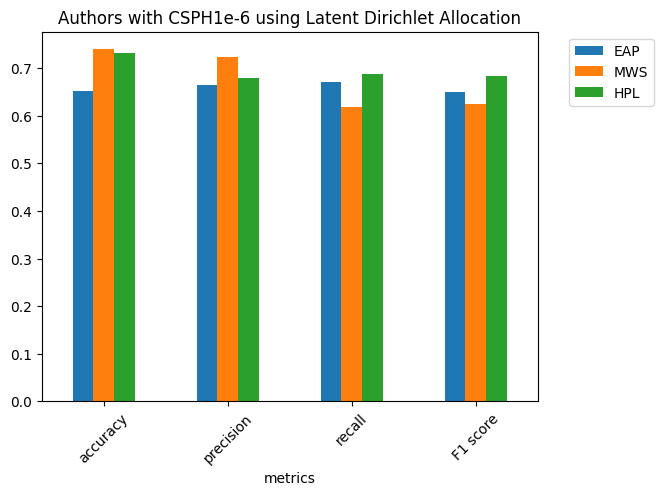

In [27]:
for method in ["bayes", "lda"]:
    method_df = df.loc[:, df.columns.str.contains(f"(author|{method})")]
    for preprocessing in range(2,int((len(method_df.columns)))):
        preprocess_name = re.sub(r".*\s(\S+)$", r"\1", method_df.columns[preprocessing])
        score_df = {}
        for author in ["EAP", "MWS", "HPL"]:
            author_df = pd.DataFrame(
                {"author": method_df["author"]})
            author_df = pd.concat([author_df, method_df.iloc[:, 1:].apply(
                lambda x: [1 if author == i else 0 for i in x])], axis=1)
            author_df = author_df.rename(columns=lambda x: re.sub(r".*\s(\S+)$", r"\1", x))
            score_df[author] = [func(author_df["author_short"],author_df.iloc[:, preprocessing]) for (name, func) in metrics]
        score_df = pd.DataFrame(score_df)
        score_df.index = ["accuracy", "precision", "recall", "F1 score"]
        score_df.plot.bar(title=f"Authors with {preprocess_name} using {methods[method]}", xlabel="metrics", rot=45)
        plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
        

/home/tristan/.local/lib/python3.10/site-packages/sklearn/metrics/_plot/confusion_matrix.py:136: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


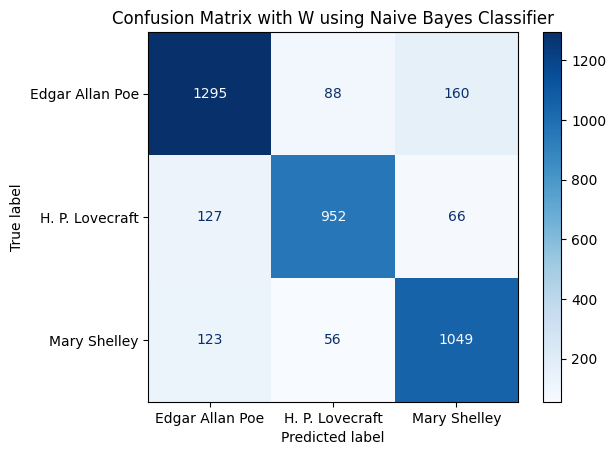

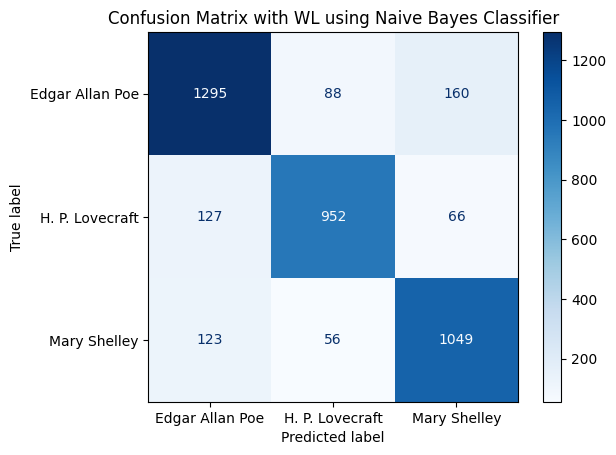

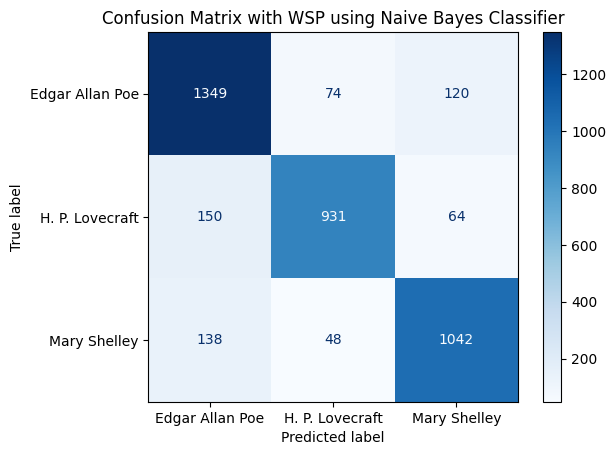

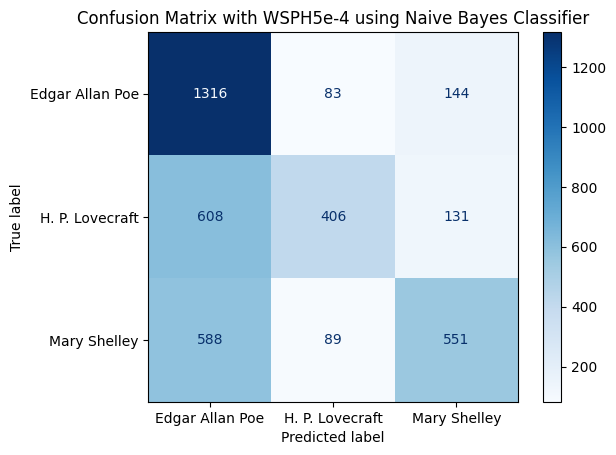

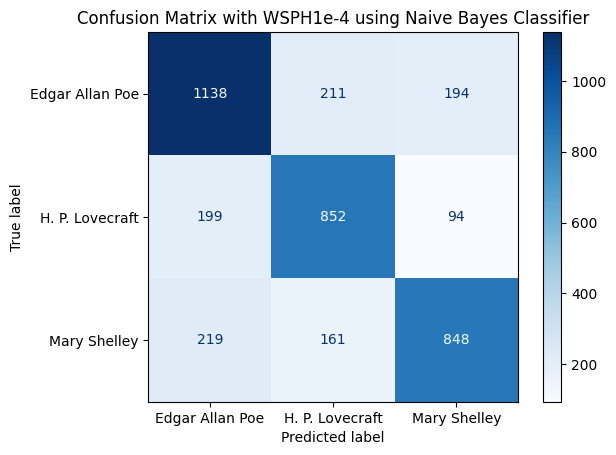

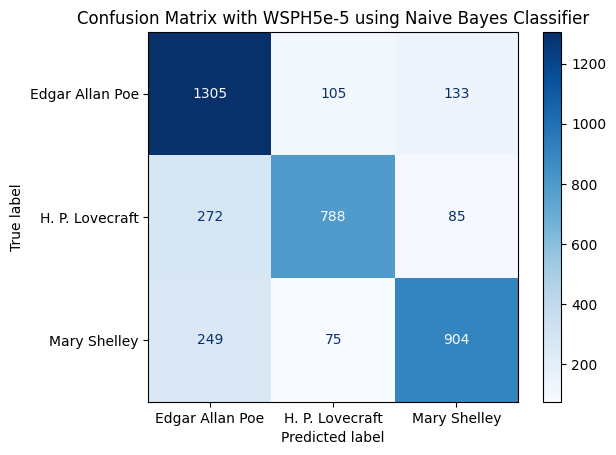

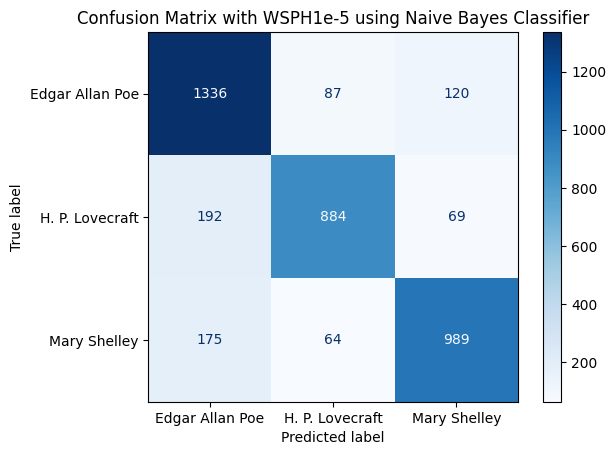

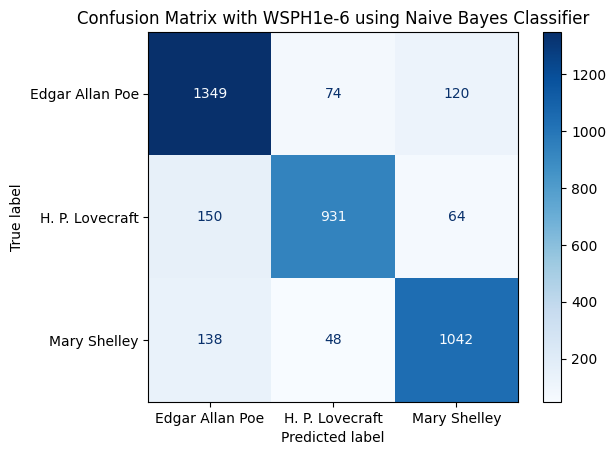

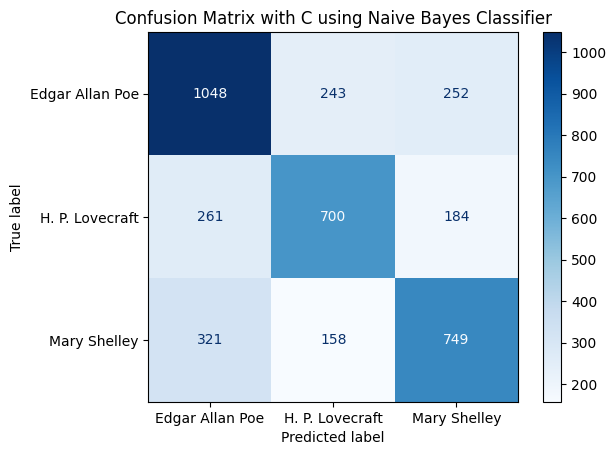

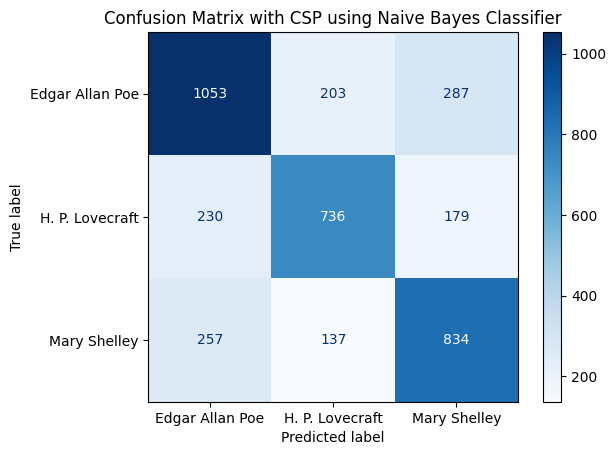

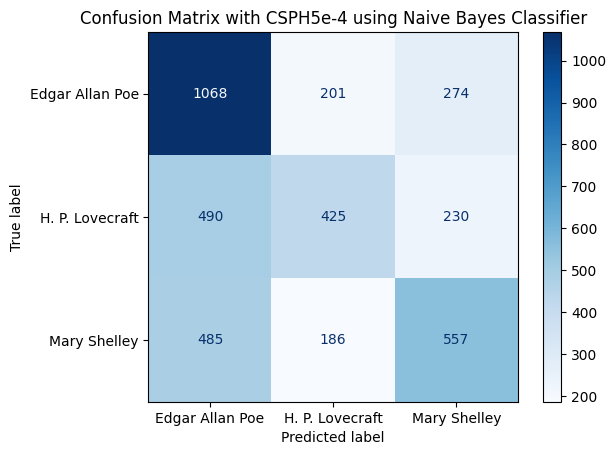

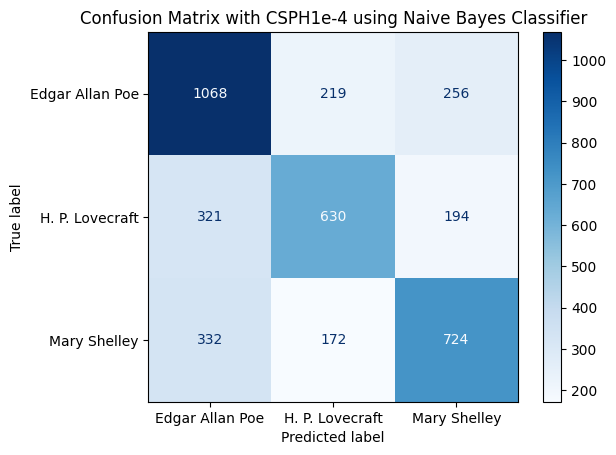

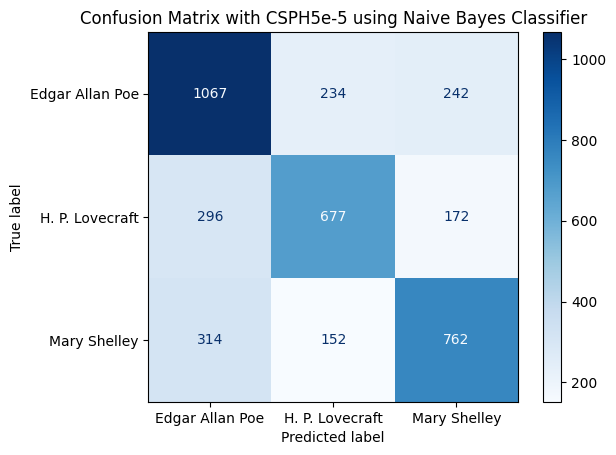

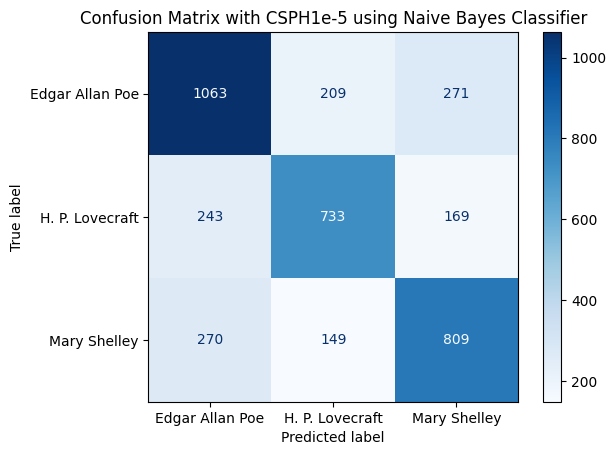

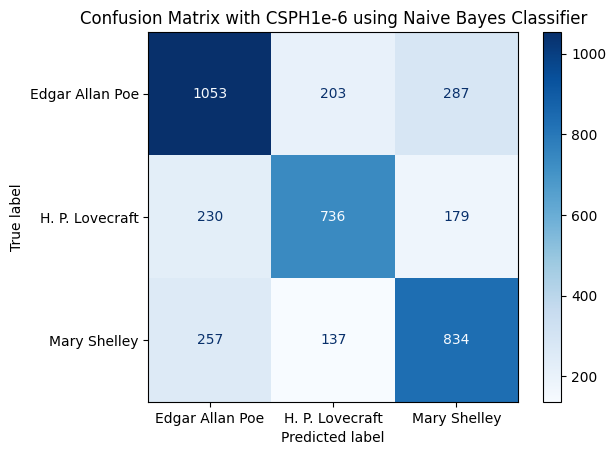

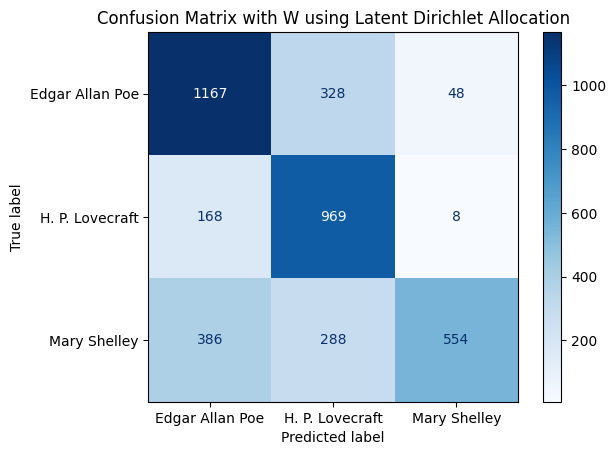

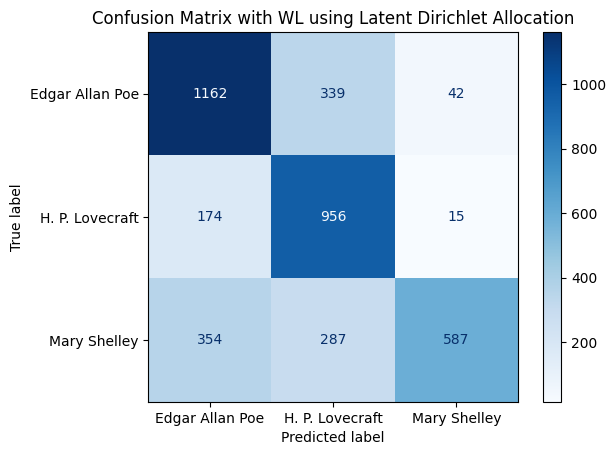

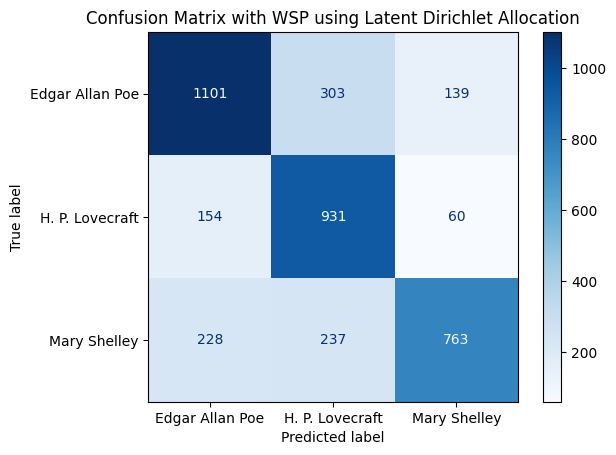

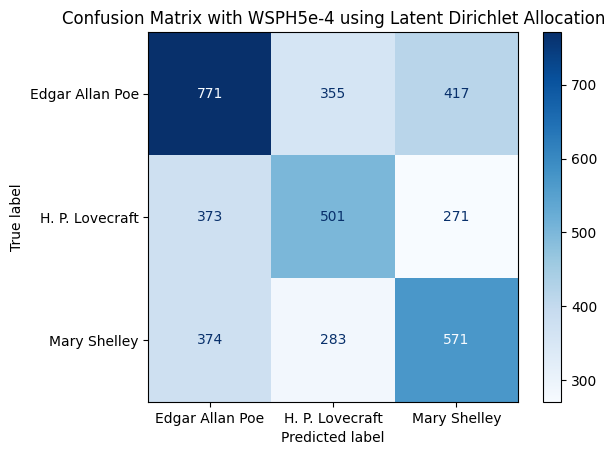

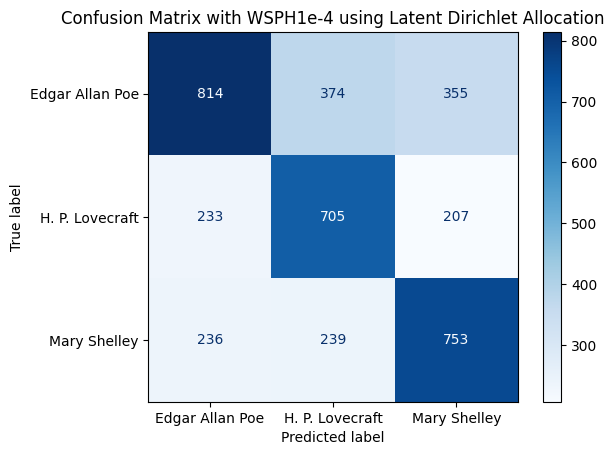

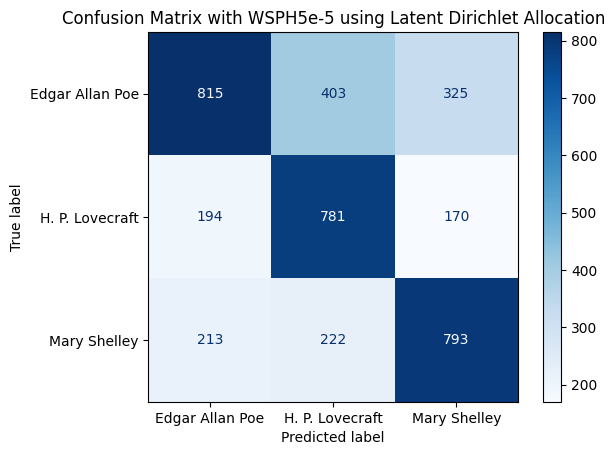

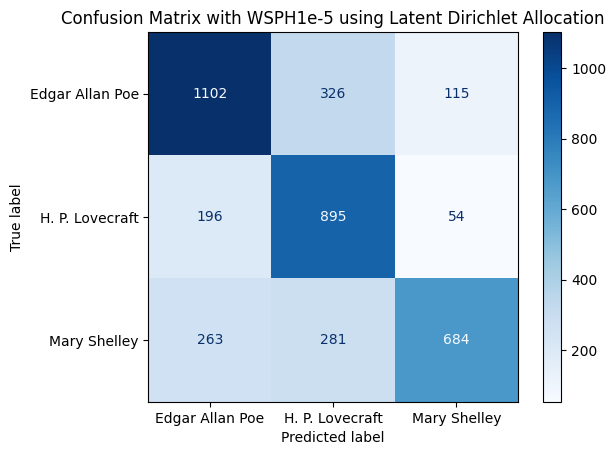

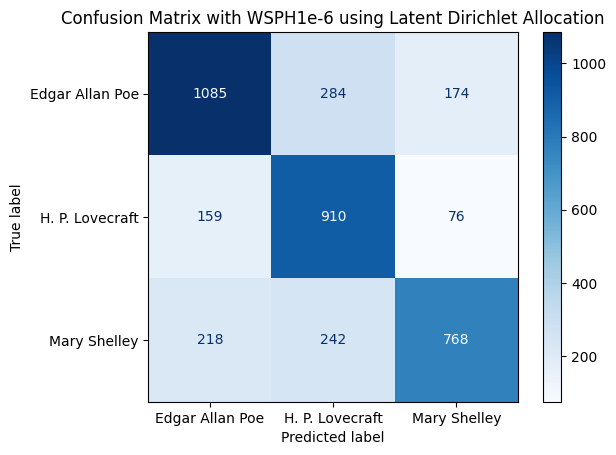

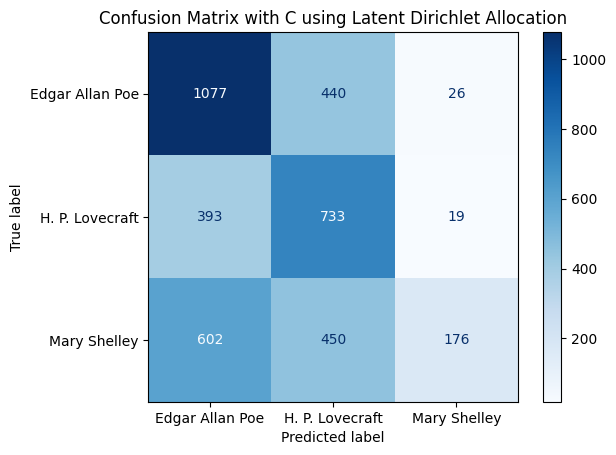

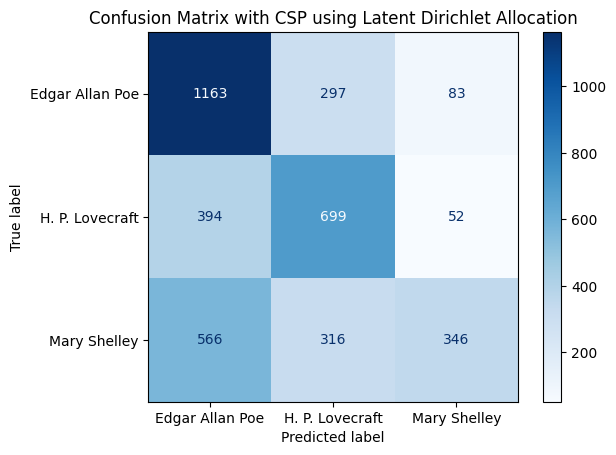

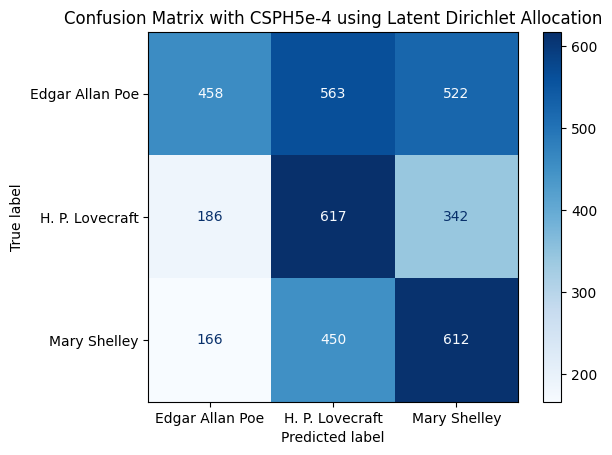

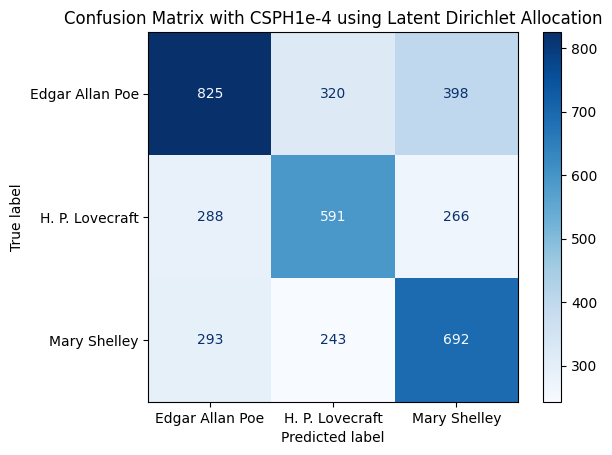

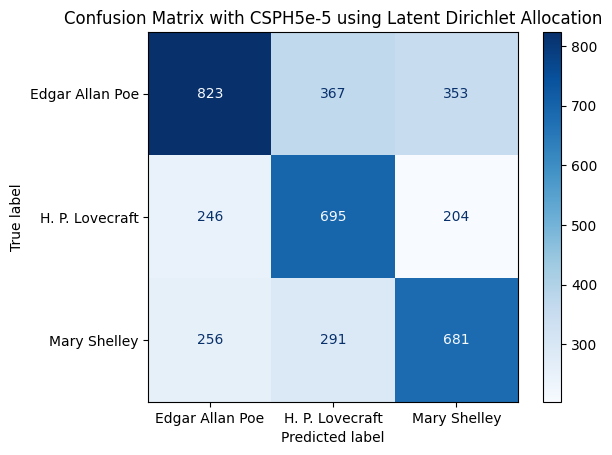

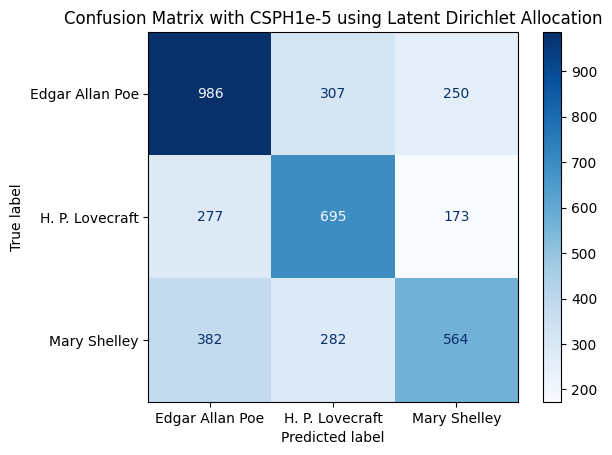

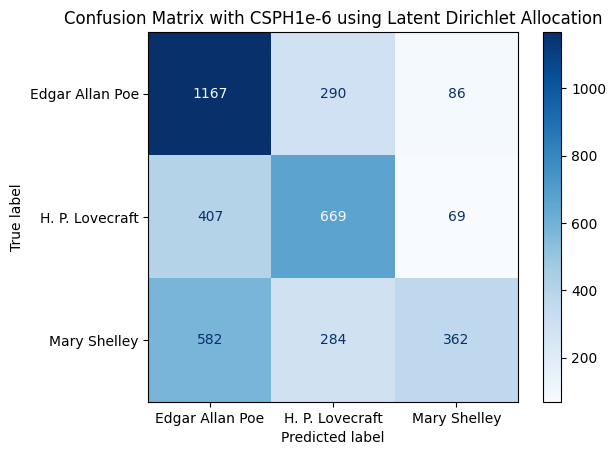

In [19]:
for method in ["bayes", "lda"]:
    method_df = df.loc[:, df.columns.str.contains(
        f"(?=.*author)|(?=.*{method})")]
    for preprocessing in range(2, int((len(method_df.columns)))):
        preprocess_name = re.sub(r".*\s(\S+)$", r"\1",
                                 method_df.columns[preprocessing])
        ConfusionMatrixDisplay.from_predictions(method_df["author_short"], method_df.iloc[:, preprocessing], display_labels=[
                                                authors_short_dict[x] for x in ["EAP", "HPL", "MWS"]], labels=["EAP", "HPL", "MWS"], cmap="Blues")
        plt.title(
            f"Confusion Matrix with {preprocess_name} using {methods[method]}")


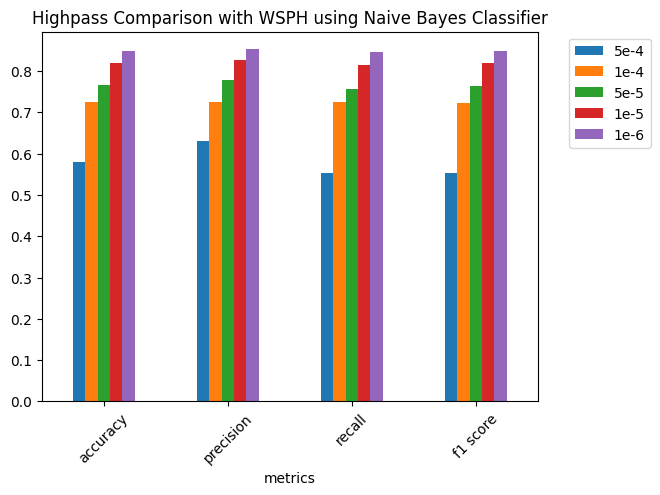

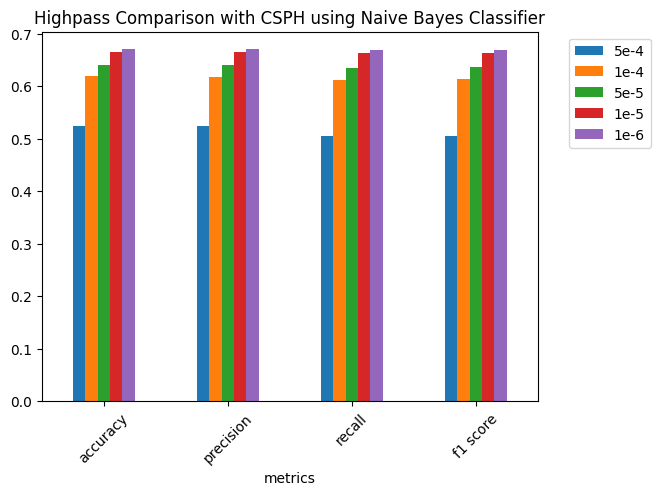

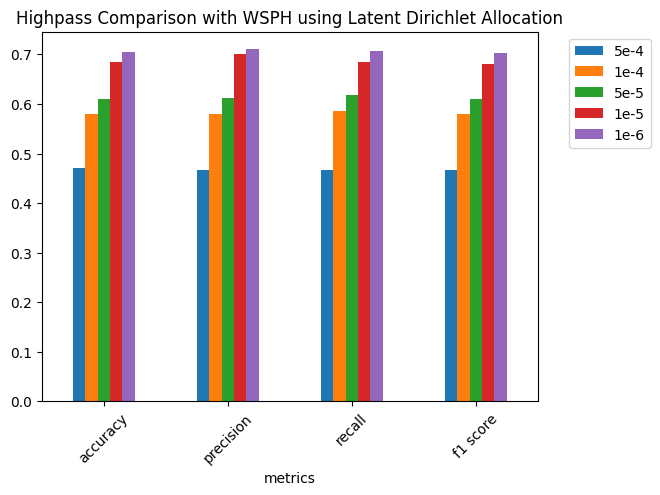

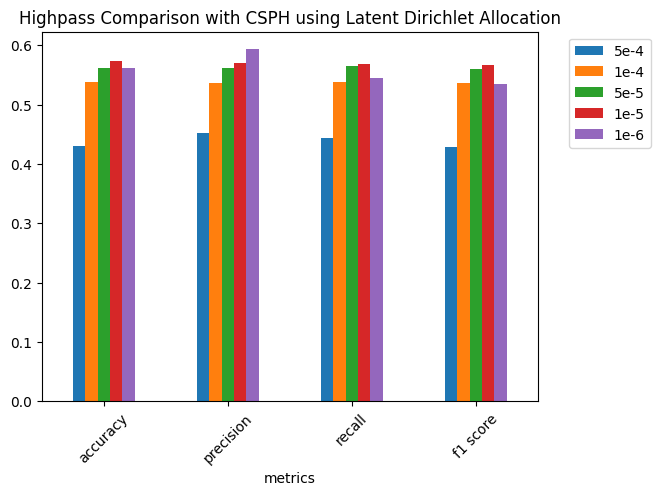

In [29]:
for method in ["bayes", "lda"]:
    for preprocessing in ["WSPH", "CSPH"]:
        method_df = df.loc[:, df.columns.str.contains(f"(?=.*author)|(?=.*{method})(?=.*{preprocessing})")]
        method_df = method_df.rename(columns=lambda x: re.sub(r".*\s(\S+)$", r"\1", x))
        score_df = method_df.iloc[: , 2:].apply(lambda x: [accuracy_score(x, method_df["author_short"]), precision_score(method_df["author_short"], x, average="macro"), recall_score(method_df["author_short"], x, average="macro"), f1_score(method_df["author_short"], x, average="macro")])
        score_df.index = ["accuracy", "precision", "recall", "f1 score"]
        score_df = score_df.rename(columns=lambda x: re.sub(r'^\D*(\d.*)', r'\1', x))
        score_df.plot.bar(title=f"Highpass Comparison with {preprocessing} using {methods[method]}", xlabel="metrics", rot=45)
        plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

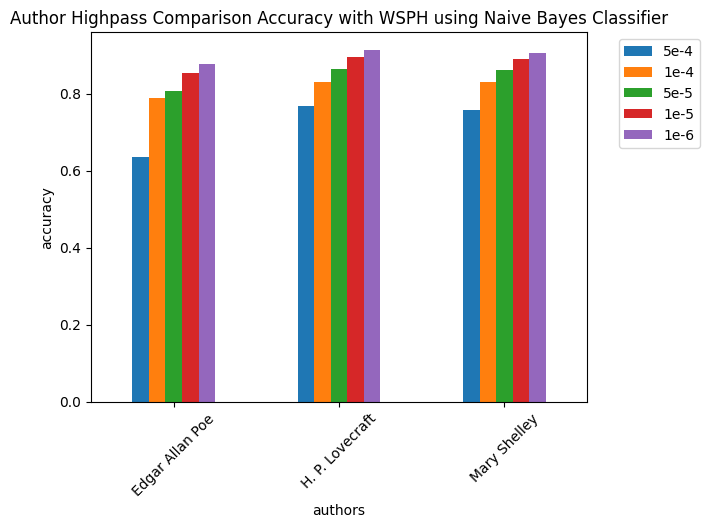

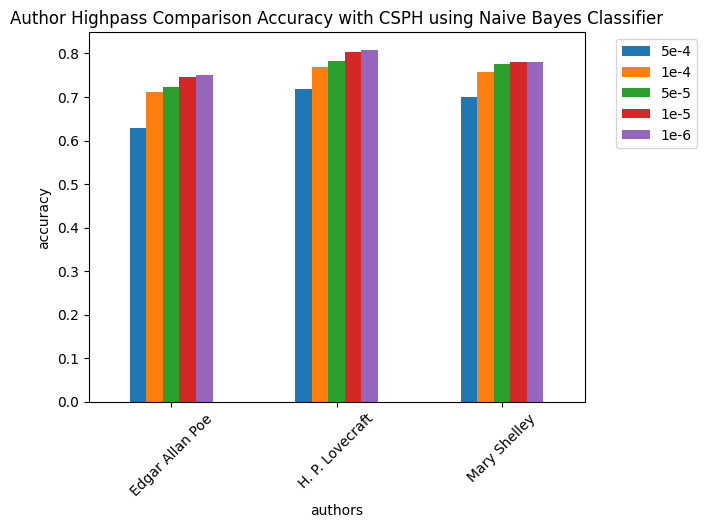

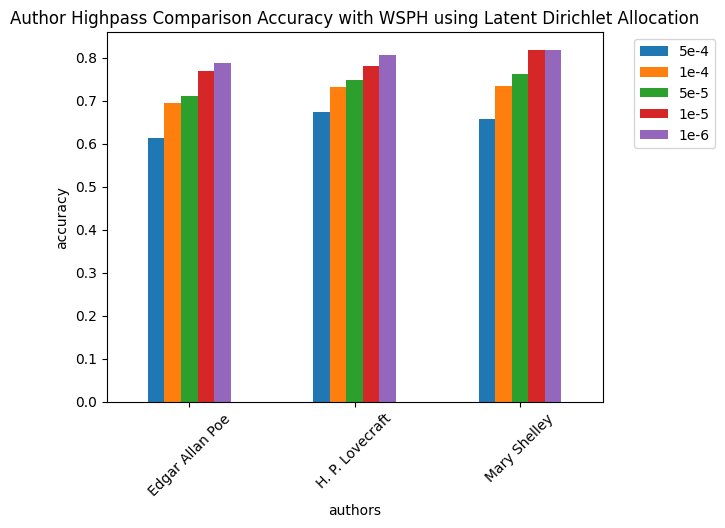

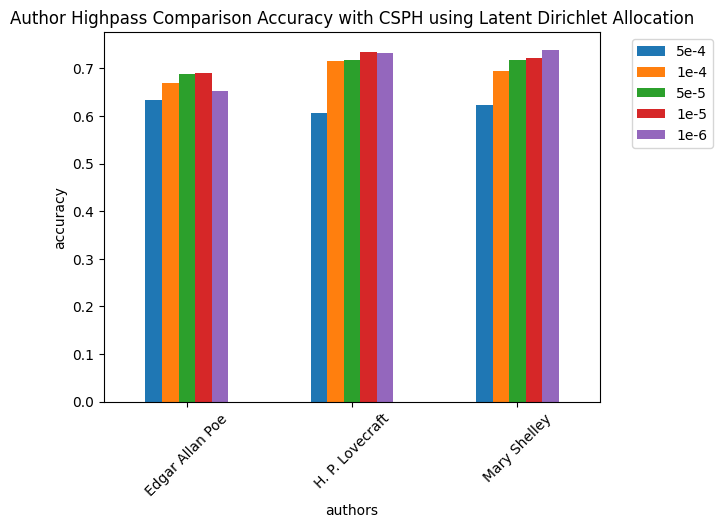

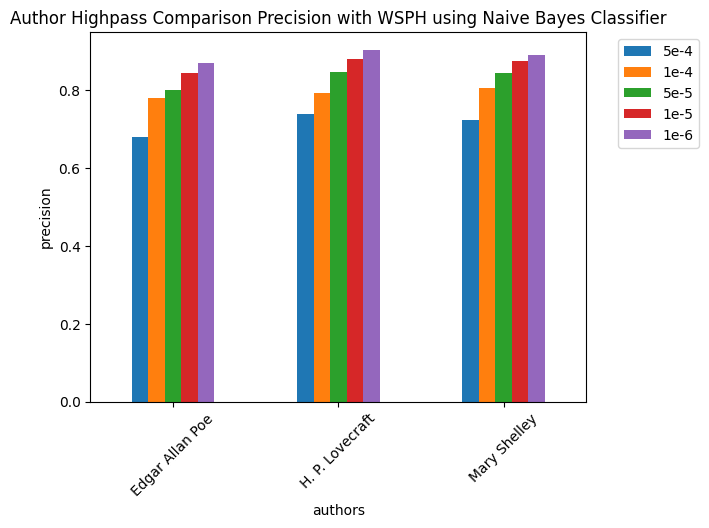

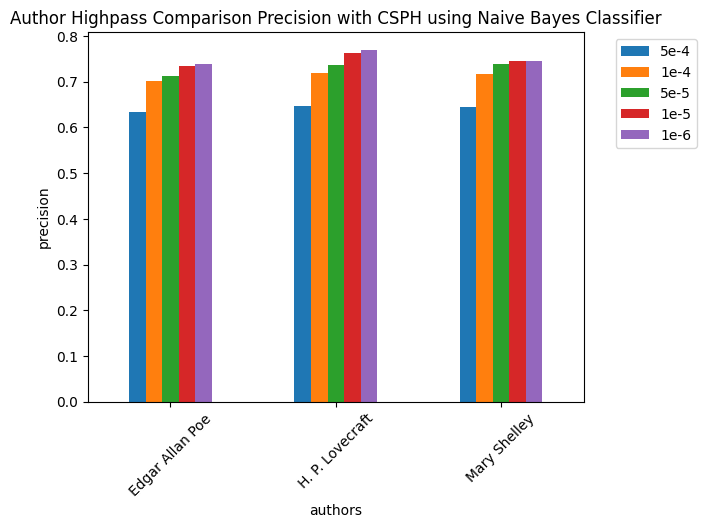

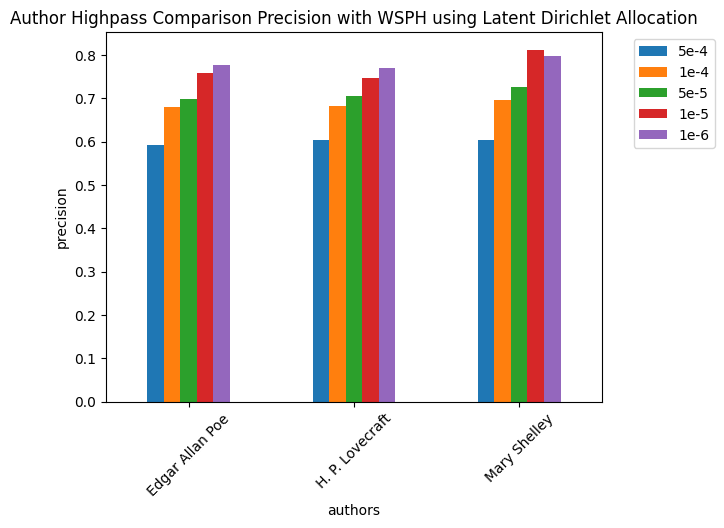

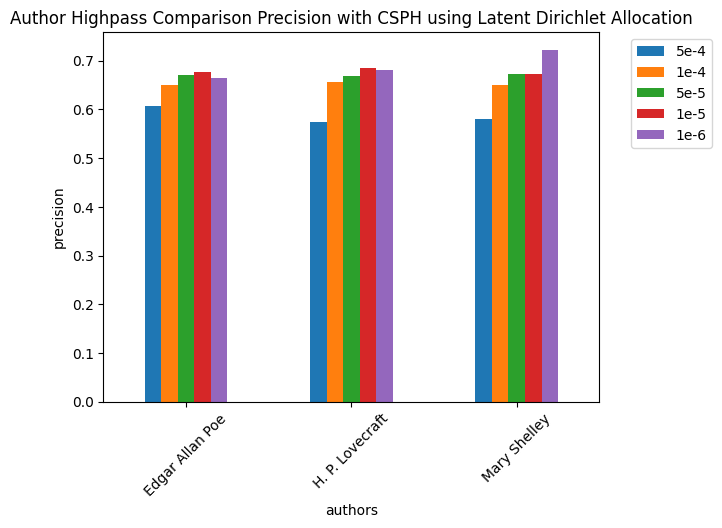

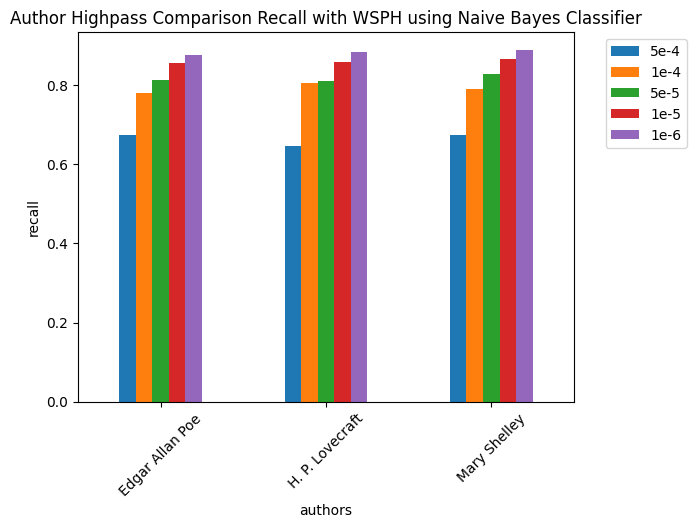

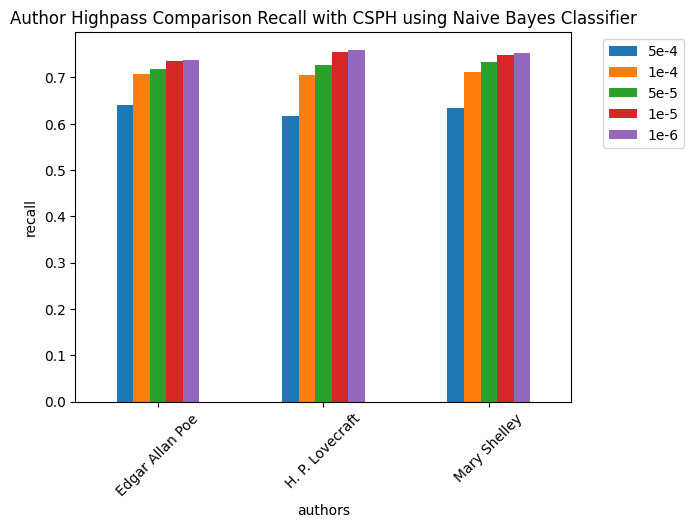

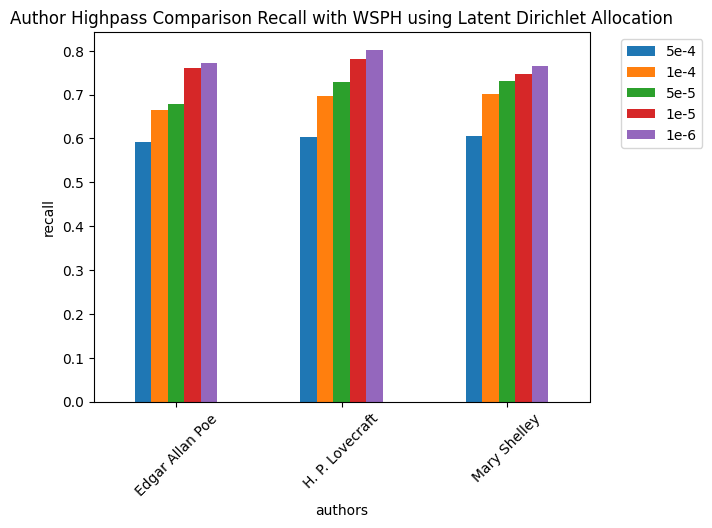

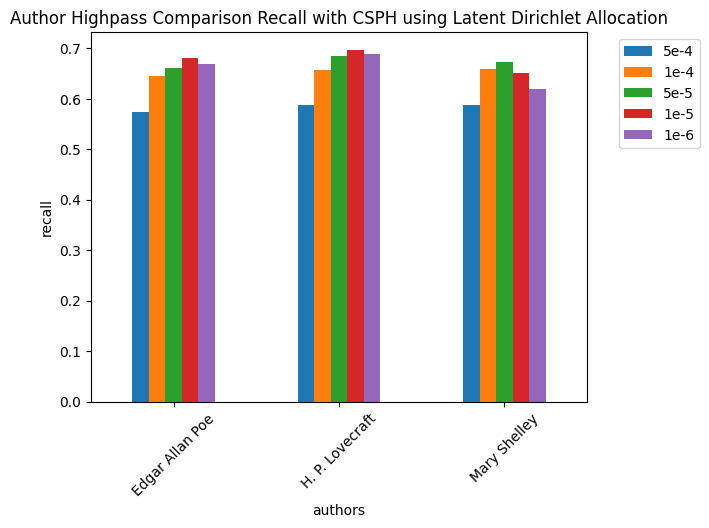

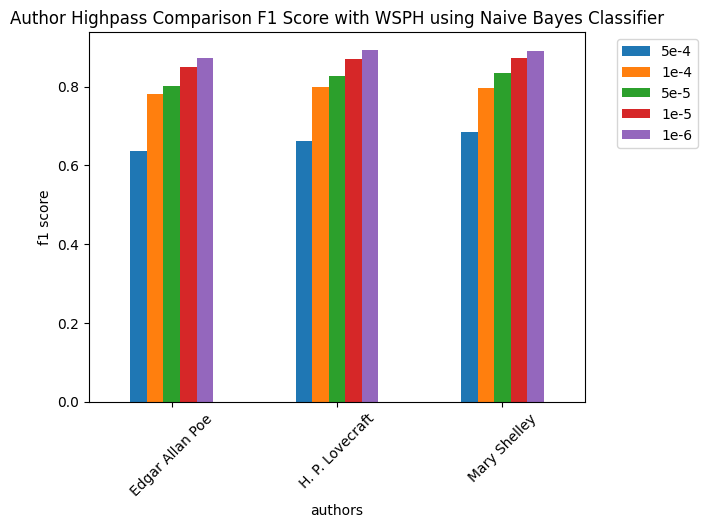

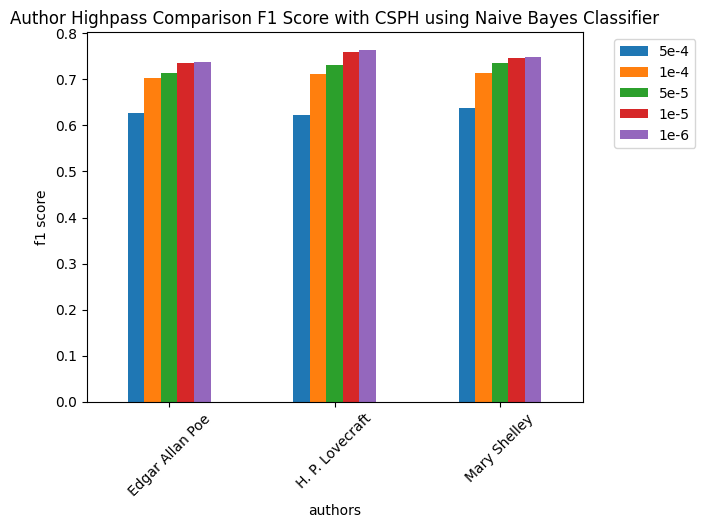

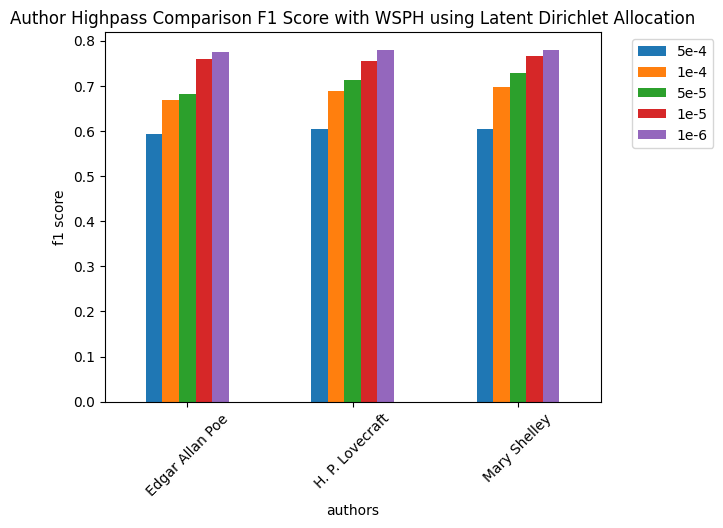

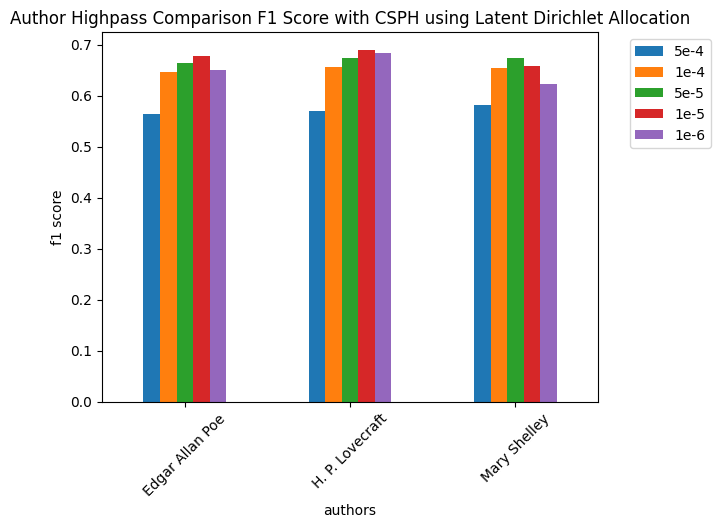

In [30]:
for (name, func) in metrics:
    for method in ["bayes", "lda"]:
        for preprocessing in ["WSPH", "CSPH"]:
            method_df = df.loc[:, df.columns.str.contains(f"(?=.*author)|(?=.*{method})(?=.*{preprocessing})")]
            cutoffs = defaultdict(lambda: [])
            for author in ["EAP", "HPL", "MWS"]:
                author_df = pd.DataFrame(
                    {"author": method_df["author"]})
                author_df = pd.concat([author_df, method_df.iloc[:, 1:].apply(
                    lambda x: [1 if author == i else 0 for i in x])], axis=1)
                for cutoff in range(2,int(len(author_df.columns))):
                    cutoffs[author_df.columns[cutoff]].append(func(author_df["author_short"], author_df.iloc[:, cutoff]))
            cutoffs = pd.DataFrame(cutoffs)
            cutoffs.index = [authors_short_dict[author] for author in ["EAP", "HPL", "MWS"]]
            cutoffs = cutoffs.rename(columns=lambda x: re.sub(r'^\D*(\d.*)', r'\1', x))
            cutoffs.plot.bar(title=f"Author Highpass Comparison {name} with {preprocessing} using {methods[method]}", xlabel="authors", ylabel=name.lower(), rot=45)
            plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
